<a href="https://colab.research.google.com/github/5c0rp264/AI_Project/blob/main/Projet_IA_Groupe_1_Version_%C3%A0_rendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<br/>

<center><img src='https://s3-eu-west-1.amazonaws.com/assets.atout-on-line.com/images/ingenieur/Logos_Ecoles/2018_2021/cesi_300.jpg'></center>
<br/>

|Auteur|Centre|Modification|
|---|---|---|
|Quentin Aoustin|Saint-Nazaire|16/03/2022|
|Tanguy Lhinares|Saint-Nazaire|16/03/2022|
|Antoine Chauvel|Saint-Nazaire|16/03/2022|

<br/>

---
L'entreprise de produits pharmaceutiques HumanForYou bas√©e en Inde emploie environ 4000 personnes. Cependant, chaque ann√©e elle subit un turn-over d'environ 15% de ses employ√©s n√©cessitant de retrouver des profils similaires sur le march√© de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :


*   Les projets sur lesquels √©taient les employ√©s quittant la soci√©t√© prennent du retard ce qui nuit √† la r√©putation de l'entreprise aupr√®s de ses clients et partenaires.
*   Un service de ressources humaines de taille cons√©quente doit √™tre conserv√© car il faut avoir les moyens de trouver les nouvelles recrues.
*   Du temps est perdu √† l'arriv√©e des nouveaux employ√©s car ils doivent tr√®s souvent √™tre form√©s et ont besoin de temps pour devenir pleinement op√©rationnels dans leur nouvel environnement.


Le direction fait donc appel √† nous, sp√©cialistes de l'analyse de donn√©es, pour d√©terminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des mod√®les afin d'avoir des pistes d'am√©lioration pour donner √† leurs employ√©s l'envie de rester. Nous allons donc pr√©parer les donn√©es avant de les traiter sur diff√©rents mod√®les, en vue de les comparer, avant de proposer des pistes de solution √† partir du mod√®le s√©lectionn√©.

# Pr√©paration des donn√©es

## Pr√©paration de l'environnement

In [ ]:
pip install numpy

In [ ]:
pip install panda

  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7256 sha256=daa43bfb685ff1196a0c585eeb6c84d17ff362ffcc64d64ce8b6226ce4813d44
  Stored in directory: /root/.cache/pip/wheels/e6/3d/81/a3665ce657d35359ca337b1db2975dbe5cd281a88b8982f6b6
Successfully built panda


In [ ]:
pip install sklearn

In [ ]:
import numpy as np
import os 

from numpy.random import default_rng
random = default_rng(42)

## Import des donn√©es

In [ ]:
import zipfile
import shutil
import glob
import pandas as pd
from six.moves import urllib

DOWNLOAD_ROOT = "https://quentin-aoustin.fr/datasets/"
DATASETS_PATH = os.path.join("/content/", "datasets/")
DATASETS_DOWNLOAD_NAMES = ["general_data.csv", "employee_survey_data.csv", "manager_survey_data.csv", "in_out_time.zip"]
DATASETS_NAMES = ["general_data.csv", "employee_survey_data.csv", "manager_survey_data.csv", "in_time.csv", "out_time.csv"]

def fetch_data(url=DOWNLOAD_ROOT, path=DATASETS_PATH, names=DATASETS_DOWNLOAD_NAMES):
  if not os.path.isdir(path):
      os.makedirs(path)
  
  for url in names:
    urllib.request.urlretrieve(DOWNLOAD_ROOT + url, path + url)
    if url.split(".")[1] == "zip":
      with zipfile.ZipFile(path + url, "r") as zip_ref:
        zip_ref.extractall(path)


fetch_data()


Apr√®s l'import et l'extraction, on cr√©e des dataframes :

In [ ]:
general_data = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[0])
employee_survey_data = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[1])
manager_survey_data = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[2])
in_time = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[3])
out_time = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[4])

## Inspection des jeux de donn√©es bruts

In [ ]:
EMPLOYEE_COUNT = general_data.shape[0]
general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

In [ ]:
employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [ ]:
manager_survey_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [ ]:
in_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29  ...   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26  ...   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22  ...   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 09:55:29  2015-12-22 10:04:06   
1  2015-12-18 10:37:17  2015-12-21 09:49:02  2015-12-22 10:33:51   
2  2015-12-18 10:15:14  2015-12-21 10:10:28  2015-12-22 09:44:44   
3  2015-12-18 10:17:38  2015-12-21 09:58:21  2015-12-22 10:04:25   
4  2015-12-18 09:58:35  2015-12-21 10:03:41  2015-12-22 10:10:30   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 10:14:27  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41   
1  2015-12-23 10:12:10                  NaN        NaN  2015-12-28 09:31:45   
2  2015-12-23 10:15:54  2015-12-24 10:07:26        NaN  2015-12-28 09:42:05   
3  2015-12-23 10:11:46  2015-12-24 09:43:15        NaN  2015-12-28 09:52:44   
4  2015-12-23 10:13:36  2015-12-24 09:44:24        NaN  2015-12-28 10:05:15   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 10:03:36  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-29 09:55:49  2015-12-30 10:32:25  2015-12-31 09:27:20  
2  2015-12-29 09:43:36  2015-12-30 09:34:05  2015-12-31 10:28:39  
3  2015-12-29 09:33:16  2015-12-30 10:18:12  2015-12-31 10:01:15  
4  2015-12-29 10:30:53  2015-12-30 09:18:21  2015-12-31 09:41:09  

[5 rows x 262 columns]

In [ ]:
out_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13  ...   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25  ...   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45  ...   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
1  2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
2  2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
3  2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
4  2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 16:44:44  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
1  2015-12-23 17:38:18                  NaN        NaN  2015-12-28 17:08:38   
2  2015-12-23 16:59:43  2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
3  2015-12-23 17:36:35  2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
4  2015-12-23 18:00:49  2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
2  2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
3  2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
4  2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 262 columns]

Les jeux de donn√©es ont des attributs sp√©cifiques, nous allons devoir pr√©parer les donn√©es avant toute exploitation.

## Pr√©paration des jeux de donn√©es in_time et out_time pour la fusion :

On vient regarder les donn√©es dans les deux jeux :

In [ ]:
in_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29  ...   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26  ...   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22  ...   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 09:55:29  2015-12-22 10:04:06   
1  2015-12-18 10:37:17  2015-12-21 09:49:02  2015-12-22 10:33:51   
2  2015-12-18 10:15:14  2015-12-21 10:10:28  2015-12-22 09:44:44   
3  2015-12-18 10:17:38  2015-12-21 09:58:21  2015-12-22 10:04:25   
4  2015-12-18 09:58:35  2015-12-21 10:03:41  2015-12-22 10:10:30   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 10:14:27  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41   
1  2015-12-23 10:12:10                  NaN        NaN  2015-12-28 09:31:45   
2  2015-12-23 10:15:54  2015-12-24 10:07:26        NaN  2015-12-28 09:42:05   
3  2015-12-23 10:11:46  2015-12-24 09:43:15        NaN  2015-12-28 09:52:44   
4  2015-12-23 10:13:36  2015-12-24 09:44:24        NaN  2015-12-28 10:05:15   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 10:03:36  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-29 09:55:49  2015-12-30 10:32:25  2015-12-31 09:27:20  
2  2015-12-29 09:43:36  2015-12-30 09:34:05  2015-12-31 10:28:39  
3  2015-12-29 09:33:16  2015-12-30 10:18:12  2015-12-31 10:01:15  
4  2015-12-29 10:30:53  2015-12-30 09:18:21  2015-12-31 09:41:09  

[5 rows x 262 columns]

In [ ]:
out_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13  ...   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25  ...   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45  ...   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
1  2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
2  2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
3  2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
4  2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 16:44:44  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
1  2015-12-23 17:38:18                  NaN        NaN  2015-12-28 17:08:38   
2  2015-12-23 16:59:43  2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
3  2015-12-23 17:36:35  2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
4  2015-12-23 18:00:49  2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
2  2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
3  2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
4  2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 262 columns]

On vient regarder les jours o√π aucun employ√© n'√©tait pr√©sent (jour f√©ri√©, entreprise ferm√©e...) :

In [ ]:
in_time.loc[:, in_time.isnull().all()]

2015-01-01  2015-01-14  2015-01-26  2015-03-05  2015-05-01  2015-07-17  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
4405         NaN         NaN         NaN         NaN         NaN         NaN   
4406         NaN         NaN         NaN         NaN         NaN         NaN   
4407         NaN         NaN         NaN         NaN         NaN         NaN   
4408         NaN         NaN         NaN         NaN         NaN         NaN   
4409         NaN         NaN         NaN         NaN         NaN         NaN   

      2015-09-17  2015-10-02  2015-11-09  2015-11-10  2015-11-11  2015-12-25  
0            NaN         NaN         NaN         NaN         NaN         NaN  
1            NaN         NaN         NaN         NaN         NaN         NaN  
2            NaN         NaN         NaN         NaN         NaN         NaN  
3            NaN         NaN         NaN         NaN         NaN         NaN  
4            NaN         NaN         NaN         NaN         NaN         NaN  
...          ...         ...         ...         ...         ...         ...  
4405         NaN         NaN         NaN         NaN         NaN         NaN  
4406         NaN         NaN         NaN         NaN         NaN         NaN  
4407         NaN         NaN         NaN         NaN         NaN         NaN  
4408         NaN         NaN         NaN         NaN         NaN         NaN  
4409         NaN         NaN         NaN         NaN         NaN         NaN  

[4410 rows x 12 columns]

In [ ]:
out_time.loc[:, out_time.isnull().all()]

2015-01-01  2015-01-14  2015-01-26  2015-03-05  2015-05-01  2015-07-17  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
4405         NaN         NaN         NaN         NaN         NaN         NaN   
4406         NaN         NaN         NaN         NaN         NaN         NaN   
4407         NaN         NaN         NaN         NaN         NaN         NaN   
4408         NaN         NaN         NaN         NaN         NaN         NaN   
4409         NaN         NaN         NaN         NaN         NaN         NaN   

      2015-09-17  2015-10-02  2015-11-09  2015-11-10  2015-11-11  2015-12-25  
0            NaN         NaN         NaN         NaN         NaN         NaN  
1            NaN         NaN         NaN         NaN         NaN         NaN  
2            NaN         NaN         NaN         NaN         NaN         NaN  
3            NaN         NaN         NaN         NaN         NaN         NaN  
4            NaN         NaN         NaN         NaN         NaN         NaN  
...          ...         ...         ...         ...         ...         ...  
4405         NaN         NaN         NaN         NaN         NaN         NaN  
4406         NaN         NaN         NaN         NaN         NaN         NaN  
4407         NaN         NaN         NaN         NaN         NaN         NaN  
4408         NaN         NaN         NaN         NaN         NaN         NaN  
4409         NaN         NaN         NaN         NaN         NaN         NaN  

[4410 rows x 12 columns]

On vient verifier que les jours o√π les employ√©s sont absents sont les m√™mes dans in et out :


In [ ]:
np.array_equiv(in_time.loc[:, in_time.isnull().all()], out_time.loc[:, out_time.isnull().all()])

False

*On* vient ensuite supprimer ces colonnes qui ne sont pas importantes : 

In [ ]:
in_time = in_time.dropna(axis=1, how='all')
out_time = out_time.dropna(axis=1, how='all')
print(in_time.shape, out_time.shape)

(4410, 250) (4410, 250)


Et on vient remplacer les valeurs nulles dans les autres colonnes :

In [ ]:
in_time = in_time.fillna(0)
out_time = out_time.fillna(0)

On regarde les deux jeux de donn√©es apr√®s ces premi√®res transformations :

In [ ]:
in_time.head()

Unnamed: 0           2015-01-02           2015-01-05           2015-01-06  \
0           1  2015-01-02 09:43:45  2015-01-05 10:08:48  2015-01-06 09:54:26   
1           2  2015-01-02 10:15:44  2015-01-05 10:21:05                    0   
2           3  2015-01-02 10:17:41  2015-01-05 09:50:50  2015-01-06 10:14:13   
3           4  2015-01-02 10:05:06  2015-01-05 09:56:32  2015-01-06 10:11:07   
4           5  2015-01-02 10:28:17  2015-01-05 09:49:58  2015-01-06 09:45:28   

            2015-01-07           2015-01-08           2015-01-09  \
0  2015-01-07 09:34:31  2015-01-08 09:51:09  2015-01-09 10:09:25   
1  2015-01-07 09:45:17  2015-01-08 10:09:04  2015-01-09 09:43:26   
2  2015-01-07 09:47:27  2015-01-08 10:03:40  2015-01-09 10:05:49   
3  2015-01-07 09:37:30  2015-01-08 10:02:08  2015-01-09 10:08:12   
4  2015-01-07 09:49:37  2015-01-08 10:19:44  2015-01-09 10:00:50   

            2015-01-12           2015-01-13           2015-01-15  ...  \
0  2015-01-12 09:42:53  2015-01-13 10:13:06  2015-01-15 10:01:24  ...   
1  2015-01-12 10:00:07  2015-01-13 10:43:29  2015-01-15 09:37:57  ...   
2  2015-01-12 10:03:47  2015-01-13 10:21:26  2015-01-15 09:55:11  ...   
3  2015-01-12 10:13:42  2015-01-13 09:53:22  2015-01-15 10:00:50  ...   
4  2015-01-12 10:29:27  2015-01-13 09:59:32  2015-01-15 10:06:12  ...   

            2015-12-17           2015-12-18           2015-12-21  \
0                    0                    0  2015-12-21 09:55:29   
1  2015-12-17 09:15:08  2015-12-18 10:37:17  2015-12-21 09:49:02   
2  2015-12-17 09:53:17  2015-12-18 10:15:14  2015-12-21 10:10:28   
3  2015-12-17 09:54:36  2015-12-18 10:17:38  2015-12-21 09:58:21   
4  2015-12-17 09:46:35  2015-12-18 09:58:35  2015-12-21 10:03:41   

            2015-12-22           2015-12-23           2015-12-24  \
0  2015-12-22 10:04:06  2015-12-23 10:14:27  2015-12-24 10:11:35   
1  2015-12-22 10:33:51  2015-12-23 10:12:10                    0   
2  2015-12-22 09:44:44  2015-12-23 10:15:54  2015-12-24 10:07:26   
3  2015-12-22 10:04:25  2015-12-23 10:11:46  2015-12-24 09:43:15   
4  2015-12-22 10:10:30  2015-12-23 10:13:36  2015-12-24 09:44:24   

            2015-12-28           2015-12-29           2015-12-30  \
0  2015-12-28 10:13:41  2015-12-29 10:03:36  2015-12-30 09:54:12   
1  2015-12-28 09:31:45  2015-12-29 09:55:49  2015-12-30 10:32:25   
2  2015-12-28 09:42:05  2015-12-29 09:43:36  2015-12-30 09:34:05   
3  2015-12-28 09:52:44  2015-12-29 09:33:16  2015-12-30 10:18:12   
4  2015-12-28 10:05:15  2015-12-29 10:30:53  2015-12-30 09:18:21   

            2015-12-31  
0  2015-12-31 10:12:44  
1  2015-12-31 09:27:20  
2  2015-12-31 10:28:39  
3  2015-12-31 10:01:15  
4  2015-12-31 09:41:09  

[5 rows x 250 columns]

In [ ]:
out_time.head()

Unnamed: 0           2015-01-02           2015-01-05           2015-01-06  \
0           1  2015-01-02 16:56:15  2015-01-05 17:20:11  2015-01-06 17:19:05   
1           2  2015-01-02 18:22:17  2015-01-05 17:48:22                    0   
2           3  2015-01-02 16:59:14  2015-01-05 17:06:46  2015-01-06 16:38:32   
3           4  2015-01-02 17:25:24  2015-01-05 17:14:03  2015-01-06 17:07:42   
4           5  2015-01-02 18:31:37  2015-01-05 17:49:15  2015-01-06 17:26:25   

            2015-01-07           2015-01-08           2015-01-09  \
0  2015-01-07 16:34:55  2015-01-08 17:08:32  2015-01-09 17:38:29   
1  2015-01-07 17:09:06  2015-01-08 17:34:04  2015-01-09 16:52:29   
2  2015-01-07 16:33:21  2015-01-08 17:24:22  2015-01-09 16:57:30   
3  2015-01-07 16:32:40  2015-01-08 16:53:11  2015-01-09 17:19:47   
4  2015-01-07 17:37:59  2015-01-08 17:59:28  2015-01-09 17:44:08   

            2015-01-12           2015-01-13           2015-01-15  ...  \
0  2015-01-12 16:58:39  2015-01-13 18:02:58  2015-01-15 17:22:13  ...   
1  2015-01-12 17:36:48  2015-01-13 18:00:13  2015-01-15 17:14:44  ...   
2  2015-01-12 17:28:54  2015-01-13 17:21:25  2015-01-15 17:21:29  ...   
3  2015-01-12 17:13:37  2015-01-13 17:11:45  2015-01-15 16:53:26  ...   
4  2015-01-12 18:51:21  2015-01-13 18:14:58  2015-01-15 18:21:48  ...   

            2015-12-17           2015-12-18           2015-12-21  \
0                    0                    0  2015-12-21 17:15:50   
1  2015-12-17 17:10:50  2015-12-18 18:31:28  2015-12-21 17:34:16   
2  2015-12-17 17:06:23  2015-12-18 17:02:23  2015-12-21 17:20:17   
3  2015-12-17 17:21:57  2015-12-18 17:55:23  2015-12-21 16:49:09   
4  2015-12-17 18:05:47  2015-12-18 17:52:48  2015-12-21 17:43:35   

            2015-12-22           2015-12-23           2015-12-24  \
0  2015-12-22 17:27:51  2015-12-23 16:44:44  2015-12-24 17:47:22   
1  2015-12-22 18:16:35  2015-12-23 17:38:18                    0   
2  2015-12-22 16:32:50  2015-12-23 16:59:43  2015-12-24 16:58:25   
3  2015-12-22 17:24:00  2015-12-23 17:36:35  2015-12-24 16:48:21   
4  2015-12-22 18:07:57  2015-12-23 18:00:49  2015-12-24 17:59:22   

            2015-12-28           2015-12-29           2015-12-30  \
0  2015-12-28 18:00:07  2015-12-29 17:22:30  2015-12-30 17:40:56   
1  2015-12-28 17:08:38  2015-12-29 17:54:46  2015-12-30 18:31:35   
2  2015-12-28 16:43:31  2015-12-29 17:09:56  2015-12-30 17:06:25   
3  2015-12-28 17:19:34  2015-12-29 16:58:16  2015-12-30 17:40:11   
4  2015-12-28 17:44:59  2015-12-29 18:47:00  2015-12-30 17:15:33   

            2015-12-31  
0  2015-12-31 17:17:33  
1  2015-12-31 17:40:58  
2  2015-12-31 17:15:50  
3  2015-12-31 17:09:14  
4  2015-12-31 17:42:14  

[5 rows x 250 columns]

Puis on vient transformer les textes de date en "Datetime", format plus facile √† manipuler par la suite :

In [ ]:
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='raise')
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='raise')

Et on calcule alors le temps de pr√©sence de chaque salari√©, chaque jour de l'ann√©e, ainsi qu'une moyenne sur l'ann√©e :

In [ ]:
total_time = in_time.iloc[:, 1:].append(out_time.iloc[:, 1:])
total_time = total_time.diff(periods=EMPLOYEE_COUNT)
total_time = total_time.iloc[EMPLOYEE_COUNT:]
total_time.reset_index(inplace=True)
total_time.drop(columns=['index'],axis=1,inplace=True)
total_time['WorkingTimeAverage'] = total_time.mean(axis=1)
total_time['WorkingTimeMedian'] = total_time.median(axis=1)
total_time['WorkingTimeStd'] = total_time.std(axis=1)
total_time.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


2015-01-02      2015-01-05      2015-01-06      2015-01-07  \
0 0 days 07:12:30 0 days 07:11:23 0 days 07:24:39 0 days 07:00:24   
1 0 days 08:06:33 0 days 07:27:17 0 days 00:00:00 0 days 07:23:49   
2 0 days 06:41:33 0 days 07:15:56 0 days 06:24:19 0 days 06:45:54   
3 0 days 07:20:18 0 days 07:17:31 0 days 06:56:35 0 days 06:55:10   
4 0 days 08:03:20 0 days 07:59:17 0 days 07:40:57 0 days 07:48:22   

       2015-01-08      2015-01-09      2015-01-12      2015-01-13  \
0 0 days 07:17:23 0 days 07:29:04 0 days 07:15:46 0 days 07:49:52   
1 0 days 07:25:00 0 days 07:09:03 0 days 07:36:41 0 days 07:16:44   
2 0 days 07:20:42 0 days 06:51:41 0 days 07:25:07 0 days 06:59:59   
3 0 days 06:51:03 0 days 07:11:35 0 days 06:59:55 0 days 07:18:23   
4 0 days 07:39:44 0 days 07:43:18 0 days 08:21:54 0 days 08:15:26   

       2015-01-15      2015-01-16  ...      2015-12-22      2015-12-23  \
0 0 days 07:20:49 0 days 07:16:03  ... 0 days 07:23:45 0 days 06:30:17   
1 0 days 07:36:47 0 days 07:43:39  ... 0 days 07:42:44 0 days 07:26:08   
2 0 days 07:26:18 0 days 07:12:37  ... 0 days 06:48:06 0 days 06:43:49   
3 0 days 06:52:36 0 days 06:54:28  ... 0 days 07:19:35 0 days 07:24:49   
4 0 days 08:15:36 0 days 08:24:13  ... 0 days 07:57:27 0 days 07:47:13   

       2015-12-24      2015-12-28      2015-12-29      2015-12-30  \
0 0 days 07:35:47 0 days 07:46:26 0 days 07:18:54 0 days 07:46:44   
1 0 days 00:00:00 0 days 07:36:53 0 days 07:58:57 0 days 07:59:10   
2 0 days 06:50:59 0 days 07:01:26 0 days 07:26:20 0 days 07:32:20   
3 0 days 07:05:06 0 days 07:26:50 0 days 07:25:00 0 days 07:21:59   
4 0 days 08:14:58 0 days 07:39:44 0 days 08:16:07 0 days 07:57:12   

       2015-12-31        WorkingTimeAverage      WorkingTimeMedian  \
0 0 days 07:04:49 0 days 06:52:12.823293172 0 days 07:21:39.500000   
1 0 days 08:13:38 0 days 07:18:57.493975903        0 days 07:42:13   
2 0 days 06:47:11 0 days 06:48:57.891566265        0 days 06:58:27   
3 0 days 07:07:59 0 days 06:47:21.172690763 0 days 07:09:24.500000   
4 0 days 08:01:05 0 days 07:52:39.220883534 0 days 07:57:12.500000   

             WorkingTimeStd  
0 0 days 01:52:34.072430752  
1 0 days 01:44:25.889813455  
2 0 days 01:11:48.206156676  
3 0 days 01:40:35.892437036  
4 0 days 01:02:51.167769692  

[5 rows x 252 columns]

On supprime l'affichage "0 days..." dans le temps moyen √† l'ann√©e, pour une lecture plus fluide : 

In [ ]:
def formatTime(variable):
  return variable.apply(lambda x : int(str(x).split(' ')[2].split(':')[0])*3600 + int(str(x).split(' ')[2].split(':')[1])*60 + float(str(x).split(' ')[2].split(':')[2]))

total_time.WorkingTimeAverage = formatTime(total_time.WorkingTimeAverage)
total_time.WorkingTimeMedian = formatTime(total_time.WorkingTimeMedian)
total_time.WorkingTimeStd = formatTime(total_time.WorkingTimeStd)
total_time.head()

2015-01-02      2015-01-05      2015-01-06      2015-01-07  \
0 0 days 07:12:30 0 days 07:11:23 0 days 07:24:39 0 days 07:00:24   
1 0 days 08:06:33 0 days 07:27:17 0 days 00:00:00 0 days 07:23:49   
2 0 days 06:41:33 0 days 07:15:56 0 days 06:24:19 0 days 06:45:54   
3 0 days 07:20:18 0 days 07:17:31 0 days 06:56:35 0 days 06:55:10   
4 0 days 08:03:20 0 days 07:59:17 0 days 07:40:57 0 days 07:48:22   

       2015-01-08      2015-01-09      2015-01-12      2015-01-13  \
0 0 days 07:17:23 0 days 07:29:04 0 days 07:15:46 0 days 07:49:52   
1 0 days 07:25:00 0 days 07:09:03 0 days 07:36:41 0 days 07:16:44   
2 0 days 07:20:42 0 days 06:51:41 0 days 07:25:07 0 days 06:59:59   
3 0 days 06:51:03 0 days 07:11:35 0 days 06:59:55 0 days 07:18:23   
4 0 days 07:39:44 0 days 07:43:18 0 days 08:21:54 0 days 08:15:26   

       2015-01-15      2015-01-16  ...      2015-12-22      2015-12-23  \
0 0 days 07:20:49 0 days 07:16:03  ... 0 days 07:23:45 0 days 06:30:17   
1 0 days 07:36:47 0 days 07:43:39  ... 0 days 07:42:44 0 days 07:26:08   
2 0 days 07:26:18 0 days 07:12:37  ... 0 days 06:48:06 0 days 06:43:49   
3 0 days 06:52:36 0 days 06:54:28  ... 0 days 07:19:35 0 days 07:24:49   
4 0 days 08:15:36 0 days 08:24:13  ... 0 days 07:57:27 0 days 07:47:13   

       2015-12-24      2015-12-28      2015-12-29      2015-12-30  \
0 0 days 07:35:47 0 days 07:46:26 0 days 07:18:54 0 days 07:46:44   
1 0 days 00:00:00 0 days 07:36:53 0 days 07:58:57 0 days 07:59:10   
2 0 days 06:50:59 0 days 07:01:26 0 days 07:26:20 0 days 07:32:20   
3 0 days 07:05:06 0 days 07:26:50 0 days 07:25:00 0 days 07:21:59   
4 0 days 08:14:58 0 days 07:39:44 0 days 08:16:07 0 days 07:57:12   

       2015-12-31 WorkingTimeAverage WorkingTimeMedian WorkingTimeStd  
0 0 days 07:04:49       24732.823293           26499.5    6754.072431  
1 0 days 08:13:38       26337.493976           27733.0    6265.889813  
2 0 days 06:47:11       24537.891566           25107.0    4308.206157  
3 0 days 07:07:59       24441.172691           25764.5    6035.892437  
4 0 days 08:01:05       28359.220884           28632.5    3771.167770  

[5 rows x 252 columns]

In [ ]:
total_time['EmployeeID'] = in_time.iloc[:, 0]
computed_time = total_time[['EmployeeID','WorkingTimeAverage', 'WorkingTimeMedian', 'WorkingTimeStd']] 
computed_time.head()

EmployeeID  WorkingTimeAverage  WorkingTimeMedian  WorkingTimeStd
0           1        24732.823293            26499.5     6754.072431
1           2        26337.493976            27733.0     6265.889813
2           3        24537.891566            25107.0     4308.206157
3           4        24441.172691            25764.5     6035.892437
4           5        28359.220884            28632.5     3771.167770

On vient cr√©er un Transformer customis√© pour r√©sumer toutes ces √©tapes en une : 


In [ ]:
class InOutTransformer():
    def __init__(self):
        return None

    def transform(self, X, y):
        X.dropna(axis=1, how='all')
        y.dropna(axis=1, how='all')
        X.iloc[:, 1:] = X.iloc[:, 1:].apply(pd.to_datetime, errors='raise')
        y.iloc[:, 1:] = y.iloc[:, 1:].apply(pd.to_datetime, errors='raise')
        X = X.fillna(0)
        y = y.fillna(0)
        total_time = X.iloc[:, 1:].append(y.iloc[:, 1:])
        total_time = total_time.diff(periods=4410)
        total_time = total_time.iloc[4410:]
        total_time.reset_index(inplace=True)
        total_time.drop(columns=['index'],axis=1,inplace=True)
        total_time['WorkingTimeAverage'] = total_time.mean(axis=1)
        total_time['WorkingTimeMedian'] = total_time.median(axis=1)
        total_time['WorkingTimeStd'] = total_time.std(axis=1)
        total_time['EmployeeID'] = in_time.iloc[:, 0]
        total_time.WorkingTimeAverage = formatTime(total_time.WorkingTimeAverage)
        total_time.WorkingTimeMedian = formatTime(total_time.WorkingTimeMedian)
        total_time.WorkingTimeStd = formatTime(total_time.WorkingTimeStd)
        return total_time[['EmployeeID','WorkingTimeAverage', 'WorkingTimeMedian', 'WorkingTimeStd']] 

    def fit(self, X, y=None):
        return self 

    def formatTime(variable):
        return variable.apply(lambda x : int(str(x).split(' ')[2].split(':')[0])*3600 + int(str(x).split(' ')[2].split(':')[1])*60 + float(str(x).split(' ')[2].split(':')[2]))

## Fusion des dataframes

In [ ]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='EmployeeID'), [general_data, employee_survey_data, manager_survey_data, InOutTransformer().transform(in_time, out_time)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app


## Premi√®re inspection du jeu de donn√©es fusionn√© 

In [ ]:
data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   YearsSinceLastPromotion YearsWithCurrManager EnvironmentSatisfaction  \
0                        0                    0                     3.0   
1                        1                    4                     3.0   
2                        0                    3                     2.0   
3                        7                    5                     4.0   
4                        0                    4                     4.0   

   JobSatisfaction  WorkLifeBalance JobInvolvement  PerformanceRating  \
0              4.0              2.0              3                  3   
1              2.0              4.0              2                  4   
2              2.0              1.0              3                  3   
3              4.0              3.0              2                  3   
4              1.0              3.0              3                  3   

   WorkingTimeAverage  WorkingTimeMedian  WorkingTimeStd  
0        24732.823293            26499.5     6754.072431  
1        26337.493976            27733.0     6265.889813  
2        24537.891566            25107.0     4308.206157  
3        24441.172691            25764.5     6035.892437  
4        28359.220884            28632.5     3771.167770  

[5 rows x 32 columns]

In [ ]:
data.shape

(4410, 32)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

On peut ici remarquer que certaines colonnes ont des valeurs manquantes :
* NumCompaniesWorked
* TotalWorkingYears
* EnvironmentSatisfaction
* JobSatisfaction
* WorkLifeBalance

On devra donc choisir une strat√©gie pour compl√©ter notre jeu de donn√©es. On vient calculer des premi√®res statistiques sur nos donn√©es num√©riques :

In [ ]:
data.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  ...  YearsSinceLastPromotion  YearsWithCurrManager  \
count         4410.0  ...              4410.000000           4410.000000   
mean             8.0  ...                 2.187755              4.123129   
std              0.0  ...                 3.221699              3.567327   
min              8.0  ...                 0.000000              0.000000   
25%              8.0  ...                 0.000000              2.000000   
50%              8.0  ...                 1.000000              3.000000   
75%              8.0  ...                 3.000000              7.000000   
max              8.0  ...                15.000000             17.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
count              4385.000000      4390.000000      4372.000000   
mean                  2.723603         2.728246         2.761436   
std                   1.092756         1.101253         0.706245   
min                   1.000000         1.000000         1.000000   
25%                   2.000000         2.000000         2.000000   
50%                   3.000000         3.000000         3.000000   
75%                   4.000000         4.000000         3.000000   
max                   4.000000         4.000000         4.000000   

       JobInvolvement  PerformanceRating  WorkingTimeAverage  \
count     4410.000000        4410.000000         4410.000000   
mean         2.729932           3.153741        26331.705296   
std          0.711400           0.360742         4790.769079   
min          1.000000           3.000000        19500.767068   
25%          2.000000           3.000000        22605.867470   
50%          3.000000           3.000000        25240.224900   
75%          3.000000           3.000000        28442.824297   
max          4.000000           4.000000        39374.140562   

       WorkingTimeMedian  WorkingTimeStd  
count        4410.000000     4410.000000  
mean        27643.425057     5952.978820  
std          4832.740263     1460.557283  
min         21158.500000     2519.978867  
25%         23919.750000     4850.653893  
50%         26587.000000     5949.299200  
75%         30023.375000     6919.771485  
max         39704.000000    10455.257926  

[8 rows x 24 columns]

Et on affiche un graphique par attribut pour regarder la distribution : 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f242ef67150>,
      dtype=object)

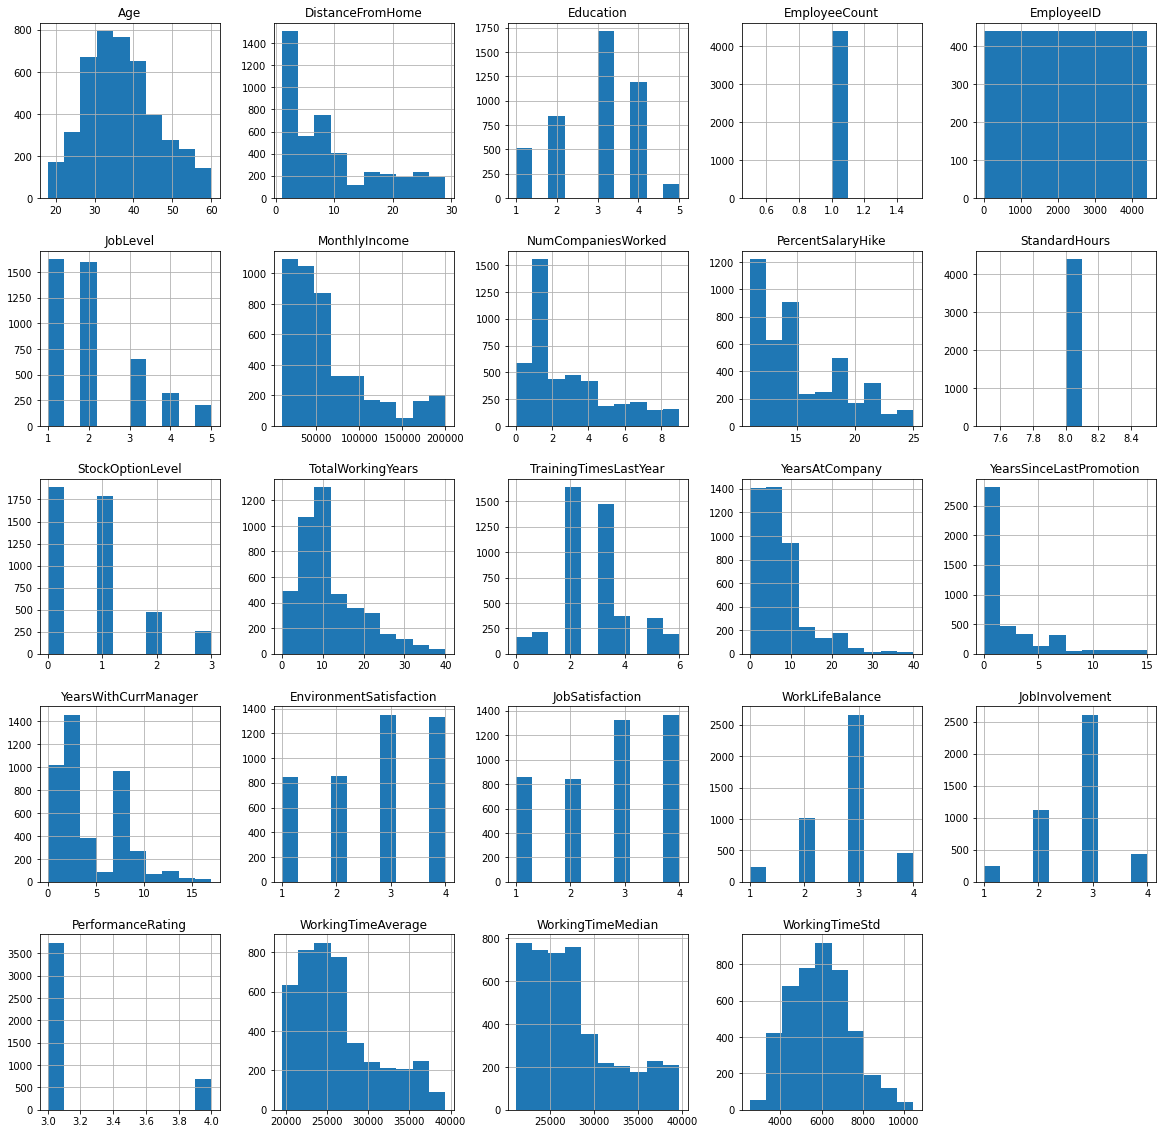

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(figsize=(20, 20))

Remarques :    

*   Tous les attributs n'ont pas les m√™mes tranches de valeur. Il faudra effectuer du "feature scaling" pour uniformiser les valeurs avant de les int√©grer dans nos mod√®les
*   La majorit√© des salaires (MonthlyIncome) est dans la tranche basse, et cela semble superposable avec le temps dans l'entreprise (YearsAtCompany), ce qui est assez logique. Il semble aussi qu'il y ait la meme distribution pour le temps d'attente avant une promotion (YearsSinceLastPromotion).



Pour ce projet, on s'int√©resse au "turn over" des salari√©s dans l'entreprise HumanForYou. La variable repr√©sentant ce taux est "Attrition", qui indique si oui ou non l'employ√© quitte l'entreprise en 2016. Pour mieux comprendre les donn√©es, on affiche l'attrition selon diff√©rents param√®tres :

In [ ]:
import seaborn as sns
def make_plot(feature_name):
    plt.figure(figsize = (8,5))
    # ax = sns.countplot(x = feature_name, hue = 'Attrition', data = data, palette = 'tab10')
    ax = sns.countplot(x = feature_name, hue = 'Attrition', data = data, palette = 'tab10')
    plt.xlabel(feature_name)
    plt.ylabel('Employee Count')
    plt.title('{} vs Attrition'.format(feature_name))
    plt.legend()

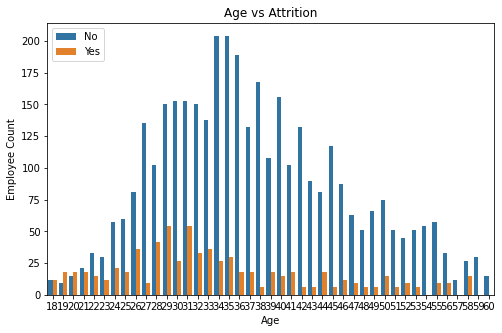

In [ ]:
make_plot('Age')

On remarque que :     

* Avec l'√¢ge, l'Attrition a une tendance √† diminuer

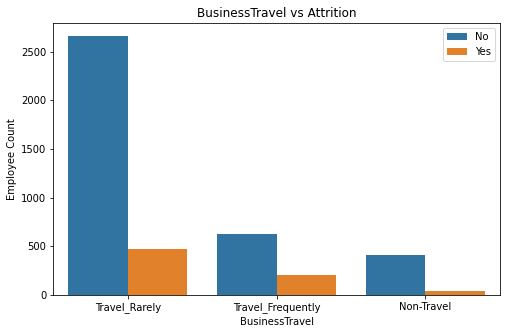

In [ ]:
make_plot('BusinessTravel')

On observe que :     

* Les employ√©s qui voyagent souvent ont tendance √† vouloir plus partir (Attrition plus √©lev√©e)

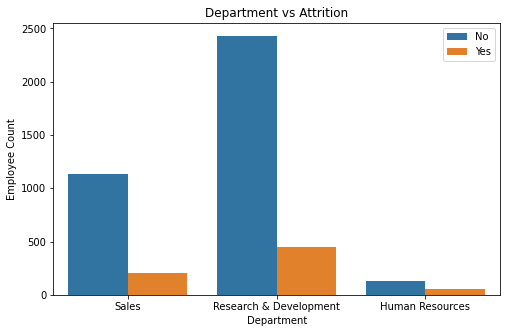

In [ ]:
make_plot('Department')

On observe que :     

* L'Attrition semble plus √©lev√©e pour les salari√©s dans le d√©partement ressources humaines

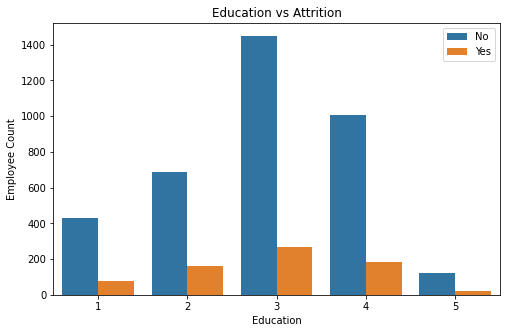

In [ ]:
make_plot('Education')

On observe que :    

* La proportion d'Attrition semble identique peu importe le niveau d'√©ducation

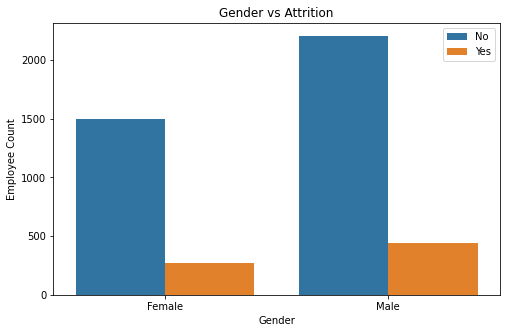

In [ ]:
make_plot('Gender')

On observe que :     

* Le genre n'a pas un impact significatif sur l'Attrition. 

Le genre est pour nous un crit√®re √©thiquement discutable. En effet, il nous appara√Æt que cet attribut peut √™tre une source de discrimination importante, raison pour laquelle nous mettrons en place la possibilit√© de ne pas tenir compte de ce crit√®re dans la suite du traitement. Tous nos raisonnements au regard des traitements √©thiques sont d√©taill√©s dans le livrable d√©di√©.

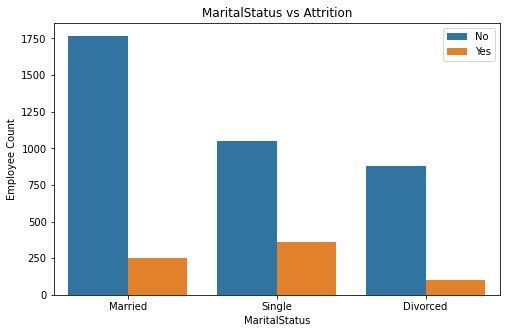

In [ ]:
make_plot('MaritalStatus')

On observe que :     

* Les employ√©s c√©libataires semblent avoir un taux d'Attrition plus √©lev√©

A ce stade, recueillir une telle information priv√©e ne nous appara√Æt pas √©thiquement valable. En effet, ce statut peut √™tre amen√© √† √©voluer dans le temps et constitue un indicateur discriminant. 

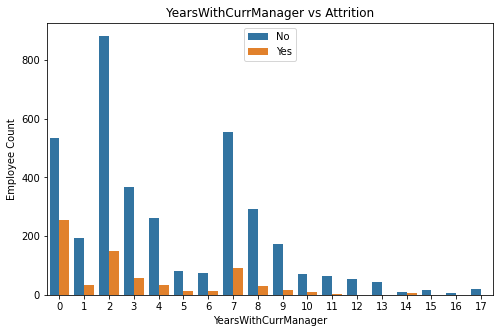

In [ ]:
make_plot('YearsWithCurrManager')

On observe que :     

* L'attrition semble se r√©duire plus le nombre d'ann√©es pass√©es avec un manager augmente

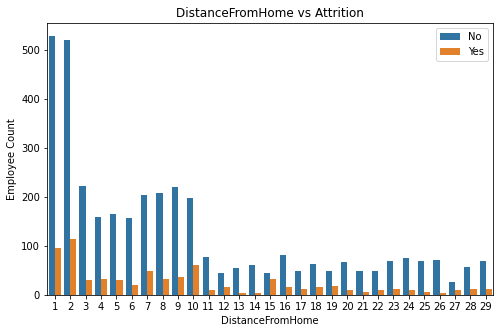

In [ ]:
make_plot('DistanceFromHome')

On remarque que :    

* Les employ√©s relativement √©loign√©s semblent avoir un taux plus √©lev√©, sans que cela soit g√©n√©ralisable en un coup d'oeil 

Avant de s√©parer notre jeu de donn√©es, on vient regarder si les features sont corr√©l√©es entre elles : 

In [ ]:
data.corr()

Age  DistanceFromHome  Education  EmployeeCount  \
Age                      1.000000          0.006963  -0.035706            NaN   
DistanceFromHome         0.006963          1.000000  -0.008638            NaN   
Education               -0.035706         -0.008638   1.000000            NaN   
EmployeeCount                 NaN               NaN        NaN            NaN   
EmployeeID               0.008649         -0.001097  -0.009680            NaN   
JobLevel                -0.002884         -0.037329   0.045746            NaN   
MonthlyIncome           -0.044314         -0.021607   0.006410            NaN   
NumCompaniesWorked       0.299243         -0.013843  -0.016250            NaN   
PercentSalaryHike       -0.033137          0.038125  -0.040531            NaN   
StandardHours                 NaN               NaN        NaN            NaN   
StockOptionLevel        -0.031753          0.011169   0.001261            NaN   
TotalWorkingYears        0.680661          0.009374  -0.010717            NaN   
TrainingTimesLastYear   -0.027308         -0.009001   0.010472            NaN   
YearsAtCompany           0.311309          0.031684   0.006080            NaN   
YearsSinceLastPromotion  0.216513          0.002290   0.022490            NaN   
YearsWithCurrManager     0.202089          0.021584   0.005358            NaN   
EnvironmentSatisfaction  0.010089          0.020183  -0.045469            NaN   
JobSatisfaction         -0.003086         -0.011144  -0.004173            NaN   
WorkLifeBalance         -0.021297          0.008000  -0.006406            NaN   
JobInvolvement           0.018196         -0.001837  -0.018279            NaN   
PerformanceRating       -0.025563          0.036418  -0.035591            NaN   
WorkingTimeAverage      -0.000377          0.009928   0.001406            NaN   
WorkingTimeMedian        0.000227          0.009538   0.002327            NaN   
WorkingTimeStd           0.005380         -0.001073   0.007369            NaN   

                         EmployeeID  JobLevel  MonthlyIncome  \
Age                        0.008649 -0.002884      -0.044314   
DistanceFromHome          -0.001097 -0.037329      -0.021607   
Education                 -0.009680  0.045746       0.006410   
EmployeeCount                   NaN       NaN            NaN   
EmployeeID                 1.000000 -0.003303       0.007338   
JobLevel                  -0.003303  1.000000       0.047316   
MonthlyIncome              0.007338  0.047316       1.000000   
NumCompaniesWorked        -0.001117 -0.009875      -0.020726   
PercentSalaryHike         -0.004456  0.010973       0.004325   
StandardHours                   NaN       NaN            NaN   
StockOptionLevel          -0.014254  0.000993       0.026930   
TotalWorkingYears         -0.001063 -0.036957      -0.033787   
TrainingTimesLastYear     -0.010191 -0.032500       0.050112   
YearsAtCompany             0.004086 -0.064219       0.000995   
YearsSinceLastPromotion    0.000256 -0.060811       0.065219   
YearsWithCurrManager       0.008579 -0.055251       0.024304   
EnvironmentSatisfaction    0.000798 -0.024448      -0.006006   
JobSatisfaction           -0.001053 -0.018279       0.005063   
WorkLifeBalance           -0.001723 -0.027664       0.003572   
JobInvolvement             0.008591 -0.012630       0.023346   
PerformanceRating         -0.006892 -0.002474       0.016093   
WorkingTimeAverage        -0.010239  0.011067      -0.012430   
WorkingTimeMedian         -0.011370  0.012720      -0.012298   
WorkingTimeStd            -0.010793  0.013298      -0.004192   

                         NumCompaniesWorked  PercentSalaryHike  StandardHours  \
Age                                0.299243          -0.033137            NaN   
DistanceFromHome                  -0.013843           0.038125            NaN   
Education                         -0.016250          -0.040531            NaN   
EmployeeCount                           NaN                NaN            NaN  

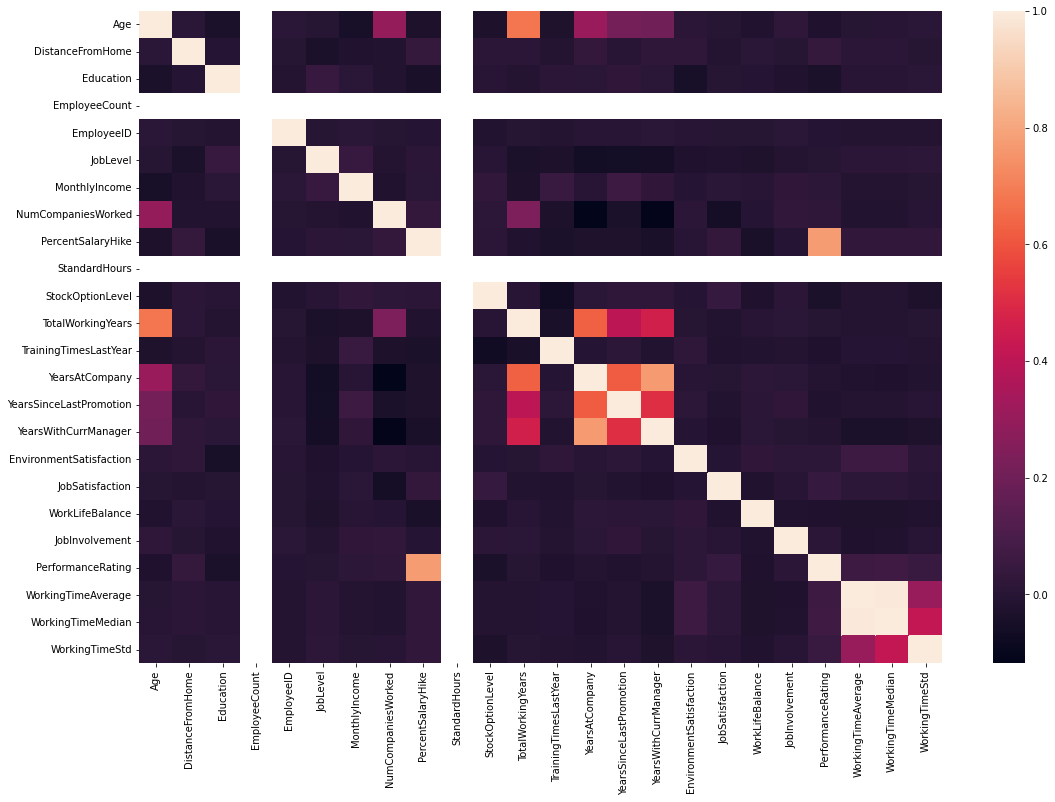

In [ ]:
import seaborn as sns
plt.figure(figsize = (18,12))
sns.heatmap(data.corr())


Nous avons d√©j√† suffisamment regard√© nos donn√©es. Pour √©viter d'√©tablir mentalement des patrons, nous allons s√©parer les donn√©es en jeu d'entra√Ænement et jeu de test. Les manipulations seront r√©alis√©es sur le jeu d'entra√Ænement. Le jeu de test ne sera utilis√© que pour valider un mod√®le.

## S√©paration du jeu de donn√©es 

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, shuffle=True, stratify=data['Attrition'])
print(train_set.shape, test_set.shape)

(3528, 32) (882, 32)


In [ ]:
X_train = train_set.drop('Attrition', axis=1)
y_train = train_set['Attrition'].copy()
X_train.shape

(3528, 31)

In [ ]:
X_test = test_set.drop('Attrition', axis=1)
y_test = test_set['Attrition'].copy()
X_test.shape

(882, 31)

On vient regarder les colonnes contenant des valeurs nulles :     

In [ ]:
X_train.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         16
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    23
JobSatisfaction            18
WorkLifeBalance            31
JobInvolvement              0
PerformanceRating           0
WorkingTimeAverage          0
WorkingTimeMedian           0
WorkingTimeStd              0
dtype: int64

Nous avons donc 4 colonnes pour lesquelles des donn√©es sont absentes pour certains employ√©s (NumCompaniesWorked, EnvironmentSatisfaction, JobSatisfcation, WorkLifeBalance). Pour avoir un jeu de donn√©es unifi√©, nous allons remplacer ces valeurs manquantes par la m√©diane de chaque attribut, qui est moins sensible aux valeurs aberrantes que la moyenne.

## Transformations des donn√©es

### Attributs num√©riques

Afin de compl√©ter les valeurs manquantes, nous allons avoir besoin d'un Imputer. Pour ne pas √™tre potentiellement influenc√© par d'√©ventuelles valeurs aberrantes, nous d√©cidons d'utiliser la m√©diane, qui remplacera les valeurs nulles dans le jeu de donn√©es.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Cela ne s'applique qu'aux colonnes num√©riques, que l'on vient r√©cup√©rer :

In [ ]:
X_train_num = X_train.select_dtypes(include=[np.number]) 

On vient calculer la m√©diane gr√¢ce √† l'Imputer pour chaque attribut num√©rique :   

In [ ]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

On peut afficher les r√©sultats calcul√©s : 

In [ ]:
imputer.statistics_

array([3.60000000e+01, 7.00000000e+00, 3.00000000e+00, 1.00000000e+00,
       2.20550000e+03, 2.00000000e+00, 5.00100000e+04, 2.00000000e+00,
       1.40000000e+01, 8.00000000e+00, 1.00000000e+00, 1.00000000e+01,
       3.00000000e+00, 5.00000000e+00, 1.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 2.53031104e+04, 2.66350000e+04, 5.96834646e+03])

Et venir remplacer les valeurs nulles gr√¢ce √† la m√©thode transform :

In [ ]:
imputer.transform(X_train_num)

array([[3.20000000e+01, 1.00000000e+00, 3.00000000e+00, ...,
        2.59523293e+04, 2.82355000e+04, 7.92922927e+03],
       [3.00000000e+01, 2.00000000e+01, 3.00000000e+00, ...,
        2.63868876e+04, 2.70200000e+04, 4.27559993e+03],
       [5.20000000e+01, 2.10000000e+01, 5.00000000e+00, ...,
        1.99341647e+04, 2.13775000e+04, 5.81428916e+03],
       ...,
       [4.30000000e+01, 1.00000000e+01, 2.00000000e+00, ...,
        2.51953012e+04, 2.65635000e+04, 6.22259792e+03],
       [3.00000000e+01, 4.00000000e+00, 3.00000000e+00, ...,
        3.40838554e+04, 3.64590000e+04, 8.96530087e+03],
       [3.20000000e+01, 3.00000000e+00, 1.00000000e+00, ...,
        2.31982410e+04, 2.36890000e+04, 3.78055616e+03]])

In [ ]:
X_train_num = pd.DataFrame(X_train_num)

Afin d'automatiser ce calcul, nous int√©grerons cette √©tape dans une Pipeline, qui est un ensemble de t√¢ches √† ex√©cuter, et que nous appliquerons sur notre jeu de donn√©es d'entra√Ænement, puis de test dans l'optique de valider un mod√®le.

### Attributs textuels et cat√©gories :

Apr√®s avoir vu le traitement que nous appliquons sur les attributs num√©riques, il est temps de traiter les attributs textuels, que l'on vient r√©cup√©rer :

In [ ]:
X_train_cat = X_train.select_dtypes(include='object') 
X_train_cat.head()

BusinessTravel              Department    EducationField Gender  \
3213      Travel_Rarely                   Sales           Medical   Male   
3547      Travel_Rarely                   Sales         Marketing   Male   
303       Travel_Rarely                   Sales  Technical Degree   Male   
2064      Travel_Rarely  Research & Development     Life Sciences   Male   
3650  Travel_Frequently                   Sales     Life Sciences   Male   

                    JobRole MaritalStatus Over18  
3213        Sales Executive        Single      Y  
3547        Sales Executive      Divorced      Y  
303                 Manager       Married      Y  
2064  Laboratory Technician       Married      Y  
3650     Research Scientist       Married      Y

Pour que nos mod√®les puissent s'entra√Æner, on va chercher √† "convertir" les attributs textuels en attributs num√©riques, c'est l'encodage. 
On remarque que les variables ne peuvent pas toutes √™tre ordonn√©es, on dit qu'elles ne sont pas ordinales. Dans ce contexte, nous d√©cidons d'utiliser la m√©thode OneHotEncoding. Cette m√©thode va venir convertir chaque attribut textuel en une colonne comportant des 0 ou des 1.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
X_train_cat_hot = cat_encoder.fit_transform(X_train_cat)
X_train_cat_hot

array([[0., 0., 1., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

On peut r√©cup√©rer les cat√©gories trait√©es, pour voir le nombre de propositions possibles √† chaque attribut, et ainsi le nombre de nouvelles colonnes ajout√© :

In [ ]:
cat_encoder.categories_

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Y'], dtype=object)]

Comme pour les attributs num√©riques, nous automatiserons cette √©tape dans une pipeline.

### Ajouts/suppressions d'attributs

Apr√®s avoir bien √©tudi√© les donn√©es brutes, il nous semble opportun d'ajouter des attributs. Notamment la quantit√© d'heures suppl√©mentaires r√©alis√©es par chaque salari√©. 

In [ ]:
X_train.head()

Age     BusinessTravel              Department  DistanceFromHome  \
3213   32      Travel_Rarely                   Sales                 1   
3547   30      Travel_Rarely                   Sales                20   
303    52      Travel_Rarely                   Sales                21   
2064   29      Travel_Rarely  Research & Development                26   
3650   36  Travel_Frequently                   Sales                16   

      Education    EducationField  EmployeeCount  EmployeeID Gender  JobLevel  \
3213          3           Medical              1        3214   Male         2   
3547          3         Marketing              1        3548   Male         3   
303           5  Technical Degree              1         304   Male         3   
2064          1     Life Sciences              1        2065   Male         1   
3650          2     Life Sciences              1        3651   Male         1   

      ... YearsSinceLastPromotion YearsWithCurrManager  \
3213  ...                       7                    7   
3547  ...                       0                    3   
303   ...                       1                   16   
2064  ...                       0                    8   
3650  ...                       6                   13   

      EnvironmentSatisfaction  JobSatisfaction WorkLifeBalance  \
3213                      3.0              4.0             3.0   
3547                      3.0              1.0             3.0   
303                       3.0              1.0             4.0   
2064                      2.0              4.0             3.0   
3650                      1.0              1.0             2.0   

      JobInvolvement  PerformanceRating  WorkingTimeAverage  \
3213               3                  3        25952.329317   
3547               2                  3        26386.887550   
303                3                  3        19934.164659   
2064               3                  4        25291.441767   
3650               3                  3        20103.325301   

      WorkingTimeMedian  WorkingTimeStd  
3213            28235.5     7929.229272  
3547            27020.0     4275.599933  
303             21377.5     5814.289159  
2064            26844.0     6706.643023  
3650            21937.0     6335.047154  

[5 rows x 31 columns]

On impl√©mente notre propre transformation pour cr√©er les nouvelles variables : 

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_overtime = True): # no *args or **kargs
        self.add_overtime = add_overtime
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        if self.add_overtime:
            x_local = X.copy()
            x_local['Overtime'] = x_local['WorkingTimeAverage'] - x_local['StandardHours']*60*60
            return x_local
        else:
            return X

On vient √©galement cr√©er notre propre transformation pour supprimer les colonnes avec des valeurs identiques pour tous les salari√©s, et les colonnes que nous jugeons discutables d'un point de vue √©thique.

In [ ]:
class AttributesRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columnsToRemove=[], ethical = True, ethicalColumnsToRemove=[]): # no *args or **kargs
        self.ethical = ethical
        self.columnsToRemove = columnsToRemove
        self.ethicalColumnsToRemove = ethicalColumnsToRemove
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        if self.ethical:
            return X.drop(columns=self.columnsToRemove + self.ethicalColumnsToRemove)
        else:
            return X.drop(columns=self.columnsToRemove)

Ces transformations seront elles aussi int√©gr√©es dans une pipeline.

## Transformation de la variable cible en valeurs bool√©ennes

In [ ]:
y_label = (y_train == "Yes")

In [ ]:
y_label_test = (y_test == "Yes")

## Pipeline de transformation

On vient combiner toutes les √©tapes sur les attributs num√©riques et textuels dans une seule suite d'instructions. Nous ajoutons √©galement un "scaling" sur les variables num√©riques, pour s'assurer, comme vu ci-avant, que les plages de valeurs des diff√©rents attributs n'influent pas sur les r√©sultats des mod√®les que nous d√©ciderons d'impl√©menter.

In [ ]:
columnsToDelete = ['EmployeeCount', 'StandardHours', 'Over18']
ethicalColumnsToDelete = ['Age', 'Gender', 'MaritalStatus', 'Education', 'EmployeeID', 'JobInvolvement', 'PerformanceRating', 'DistanceFromHome']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder()),
    ])

processor = ColumnTransformer([
        ("num", num_pipeline, selector(dtype_include="number")),
        ("cat", cat_pipeline, selector(dtype_include="object")),
    ])

def transformData(X, isTraining = True, ethical = False, columnsToRemove = [], ethicalColumnsToRemove = []):
  pipeline = Pipeline([
      ('adder', CombinedAttributesAdder()),
      ('remover', AttributesRemover(columnsToRemove=columnsToRemove, ethical=ethical, ethicalColumnsToRemove=ethicalColumnsToRemove)),    
      ('processor', processor),
  ])

  if isTraining:
    return pipeline.fit_transform(X)
  else: 
    return pipeline.transform(X)


X_train_non_ethical = transformData(X_train, isTraining = True, ethical = False, columnsToRemove = columnsToDelete)
X_train_ethical = transformData(X_train, isTraining = True, ethical = True, columnsToRemove = columnsToDelete, ethicalColumnsToRemove=ethicalColumnsToDelete)

X_test_non_ethical = transformData(X_test, isTraining = False, ethical = False, columnsToRemove = columnsToDelete)
X_test_ethical = transformData(X_test, isTraining = False, ethical = True, columnsToRemove = columnsToDelete, ethicalColumnsToRemove=ethicalColumnsToDelete)

# Entra√Ænement et comparaison de mod√®les

Pour bien d√©terminer les diff√©rents mod√®les qu'il pourrait √™tre judicieux d'impl√©menter au regard du jeu de donn√©es que nous avons (quelques milliers de lignes seulement) et de notre objectif (d√©terminer si un salari√© va partir ou non), nous nous appuierons sur la documentation officielle de SciKitLearn, qui pr√©sente le "chemin" pour se diriger vers diff√©rents mod√®les :

![Fiche de choix d'algorithme scikit learn](https://scikit-learn.org/stable/_static/ml_map.png)

## Introduction √† l'entrainement des mod√®les

Notre probl√®me est un probl√®me de classification binaire : on souhaite savoir si un salari√© va partir (Attrition = "Yes") ou s'il va rester (Attrition = "No"). Dans ce contexte, on va donc d√©finir pour la suite que :    

* Positif : le salari√© part 
* N√©gatif : le salari√© reste

A partir de cette cat√©gorisation, on peut d√©terminer les indicateurs suivants :    

* Vrai positif : le mod√®le pr√©dit que le salari√© part, et le salari√© part en r√©alit√©
* Vrai n√©gatif : le mod√®le pr√©dit que le salari√© reste, et le salari√© reste en r√©alit√©
* Faux positif : le mod√®le pr√©dit que le salari√© part, alors que le salari√© reste en r√©alit√©
* Faux n√©gatif : le mod√®le pr√©dit que le salari√© reste, alors que le salari√© part en r√©alit√©

En suivant la logique m√©tier d'une entreprise, nous sommes conscients que nous cherchons √† r√©duire le nombre de faux n√©gatifs. Les faux n√©gatifs repr√©sentent en effet l'indicateur le plus impactant pour l'entreprise, qui pourrait √™tre prise au d√©pourvu (frais suppl√©mentaires, retards...). Afin d'avoir une vision de la distribution de notre variable cible "Attrition", on affiche le graphique suivant : 

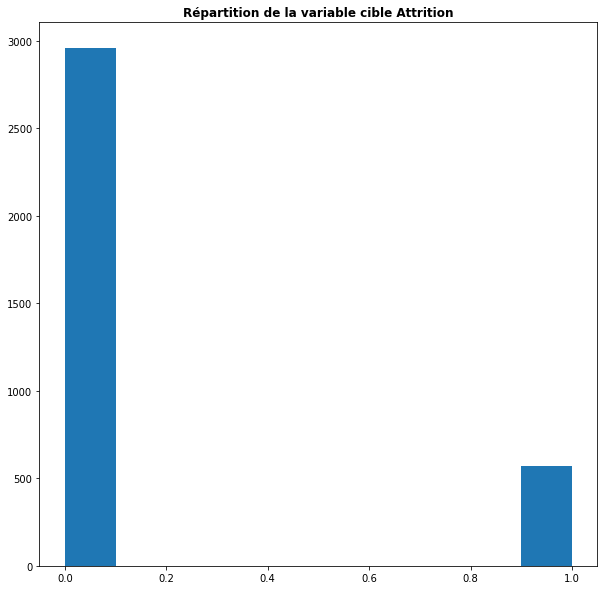

In [ ]:
y_label_binary = y_label.apply(lambda x : 1 if x == True else 0)
plt.figure(figsize=(10,10))
plt.hist(y_label_binary)
plt.title('R√©partition de la variable cible Attrition', fontweight ="bold") 
plt.show() 

Notre variable cible n'est pas uniform√©ment r√©partie dans le jeu de donn√©es.

Nous allons tester plusieurs mod√®les sur notre jeu d'entra√Ænement, pour voir celui qui correspondrait le mieux aux donn√©es. Pour chaque mod√®le, nous souhaitons valider ou non sa pertinence. Pour cela, nous allons utiliser plusieurs m√©triques, notamment la pr√©cision et le recall, permettant de conclure sur les capacit√©s de d√©tection du mod√®le (pour les faux positifs avec la pr√©cision ou les faux n√©gatifs avec le recall). Nous utiliserons √©galement la matrice de confusion, qui r√©sumera les indicateurs cit√©s ci-avant.

### Fonctions de validation communes aux diff√©rents mod√®les

In [ ]:
#Setting all constants and creating needed global variables
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

F_BETA = 0.001

data_models_comparison = {
  "Model": [],
  "AUC": [],
  "F1": [],
  "F_beta": [],
  "fpr": [],
  "tpr": [],
}

data_models_ethical_comparison = {
  "Model": [],
  "AUC": [],
  "F1": [],
  "F_beta": [],
  "fpr": [],
  "tpr": [],
}

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from random import randint
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import fbeta_score

# def plot_confusion_matrix(y, y_pred):
#   plt.subplot(2, 2, 4)
#   cf_matrix = confusion_matrix(y, y_pred)
#   sns.heatmap(cf_matrix, annot=True, fmt='g')
#   plt.show()

def plot_confusion_matrix(y, y_pred):
  plt.subplot(2, 2, 4)
  cf_matrix = confusion_matrix(y, y_pred)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  plt.show()
  
def get_roc_auc(y, y_scores):
  return roc_auc_score(y, y_scores, average=None)

def plot_roc_curve(y, y_scores):
  plt.subplot(2, 2, 3)
  fpr, tpr, thresholds = roc_curve(y, y_scores)
  plt.plot(fpr, tpr, linewidth=2, label=None)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  return fpr, tpr
  
def plot_precision_vs_recall(y, y_scores):
  plt.subplot(2, 2, 1)
  precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
  plt.plot(recalls, precisions, "k-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  
def plot_precision_recall_vs_threshold(y, y_scores):
  plt.subplot(2, 2, 2)
  precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
  plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.xlabel("Threshold", fontsize=16)
  plt.legend(loc="upper left", fontsize=16)
  plt.ylim([0, 1])
  
def make_all_plot(y, y_pred, y_scores, treshold_reg=0.5):
  f1 = 0
  fb = 0 
  AUC = 0
  plt.figure(figsize=(15, 15))
  plot_precision_vs_recall(y,y_scores)
  plot_precision_recall_vs_threshold(y,y_scores)
  fpr, tpr = plot_roc_curve(y,y_scores)
  try :
    plot_confusion_matrix(y,y_pred)
    print(f'AUC of the ROC Curve is : {get_roc_auc(y,y_scores)}')
    print(f'F1 of the this model is : {fbeta_score(y, y_pred, average="micro", beta=1)}')
    print(f'F_beta of the this model is : {fbeta_score(y, y_pred, average="micro", beta=F_BETA)}')
    AUC = get_roc_auc(y,y_scores)
    f1 = fbeta_score(y, y_pred, average="micro", beta=1)
    fb = fbeta_score(y, y_pred, average="micro", beta=F_BETA)
  except :
    print("Error since this is not a classifier")
    print("Recalculating results as positives and negatives...")
    y_cp = y.copy()
    y_pred_cp = y_pred.copy()
    y_cp = (y_cp >= treshold_reg)
    y_pred_cp = (y_pred_cp >= treshold_reg)
    try :
      plot_confusion_matrix(y_cp,y_pred_cp)
      print(f'AUC of the ROC Curve is : {get_roc_auc(y_cp,y_scores)}')
      print(f'F1 of the this model is : {fbeta_score(y_cp, y_pred_cp, average="micro", beta=1)}')
      print(f'F_beta of the this model is : {fbeta_score(y_cp, y_pred_cp, average="micro", beta=F_BETA)}')
      AUC = get_roc_auc(y_cp,y_scores)
      f1 = fbeta_score(y_cp, y_pred_cp, average="micro", beta=1)
      fb = fbeta_score(y_cp, y_pred_cp, average="micro", beta=F_BETA)
    except :
      print("Error are unstoppable üòîüòîüòî")
  plt.show()
  return {"AUC": AUC,"F1": f1,"F_beta": fb, "fpr": fpr, "tpr": tpr}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
def crossValidate(model, X, y, n_splits, make_plot=False):
  resultToReturn = []
  skfolds = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
  for train_index, test_index in skfolds.split(X, y):
    clone_model = clone(model)
    X_train_folds = X[train_index]
    y_train_folds = (y.iloc[train_index])
    X_test_fold = X[test_index]
    y_test_fold = (y.iloc[test_index])

    clone_model.fit(X_train_folds, y_train_folds)
    y_pred = clone_model.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)/len(y_test_fold)

    resultToReturn.append(n_correct)
  return resultToReturn

def crossValPredPlot(model, X, y, n_splits, make_plot=True, method="decision_function", treshold_reg=0.5):
  y_pred = cross_val_predict(model, X, y, cv=n_splits)
  if method == "predict_proba" :
    y_scores = cross_val_predict(model, X, y, cv=n_splits, method=method)[:,1]
  else :
    y_scores = cross_val_predict(model, X, y, cv=n_splits, method=method)
  if make_plot :
    return make_all_plot(y, y_pred, y_scores, treshold_reg)

Les m√©thodes ci-dessus vont permettre de tester et appliquer les diff√©rents mod√®les envisag√©s sur nos jeux d'entra√Ænement (√† la fois non √©thique et √©thique), mais aussi sur les jeux de test. Nous utilisons le processus de validation crois√©e, nous permettant de nous pr√©munir d'un risque √©lev√© de sur-apprentissage, ce qui facilitera notre interpr√©tation et la fiabilit√© de nos exp√©rimentations.

Toutes les m√©thodes √©tant r√©dig√©es, nous allons commencer par suivre la documentation de scikit learn et effectuer une classification en utilisant le mod√®le SVC Linear. Pour chaque mod√®le, nous allons faire du "Parameter Tuning", en testant plusieurs combinaisons possibles afin de d√©terminer la meilleure option, gr√¢ce √† la RandomizedSearch, qui permet de g√©n√©rer al√©atoirement plusieurs valeurs pour chaque param√®tre.

## Entrainement et comparaison de mod√®les de classification

### Mod√®le 1 : Linear SVC

On vient d√©clarer notre mod√®le et on affiche plusieurs graphiques et m√©triques pour en √©valuer la performance : score F1, AUC et matrice de confusion notamment.

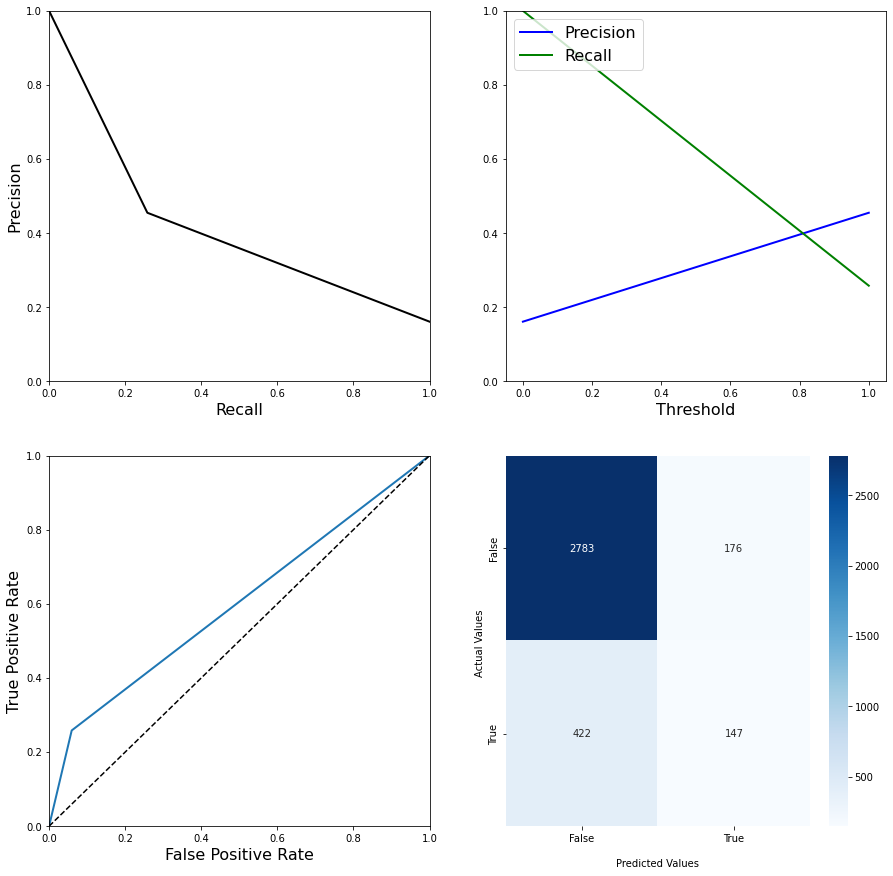

AUC of the ROC Curve is : 0.5994342125035117
F1 of the this model is : 0.8304988662131519
F_beta of the this model is : 0.8304988662131518


In [ ]:
from sklearn.svm import LinearSVC
lin_svc_clf = LinearSVC(max_iter=20, random_state=264)
lin_svc_clf.fit(X=X_train_non_ethical,y=y_label)

result = crossValPredPlot(lin_svc_clf, X_train_non_ethical, y_label, 5, make_plot=True, method="predict")

On remarque que le score F1, qui nous int√©resse particuli√®rement ici car la variable cible n'est pas distribu√©e de mani√®re √©quivalente (plus de "No" que de "Yes") n'est pas tr√®s √©lev√©. Nous devons pouvoir mieux faire. Pour cela nous allons faire du "Parameter Tuning", c'est-√†-dire tester plusieurs valeurs du param√®tre "max_iter", afin de trouver la meilleure combinaison possible. Nous r√©alisons cela gr√¢ce √† la RandomizedSearch, qui nous permet de tester de nombreuses possibilit√©s de fa√ßon simple : 

In [ ]:
param_distribs = {
        'max_iter': [randint(10, 500) for _ in range(20)],
    }

rd_search = RandomizedSearchCV(lin_svc_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)

RandomizedSearchCV(estimator=LinearSVC(max_iter=20, random_state=264),
                   param_distributions={'max_iter': [360, 245, 486, 120, 343,
                                                     463, 395, 362, 64, 266, 56,
                                                     359, 273, 101, 365, 400,
                                                     55, 71, 234, 317]},
                   return_train_score=True)

On vient afficher la meilleure option :    

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'max_iter': 245}
LinearSVC(max_iter=245, random_state=264)


Puis on recalcule les m√©triques pour ce mod√®le avec une meilleure configuration : 

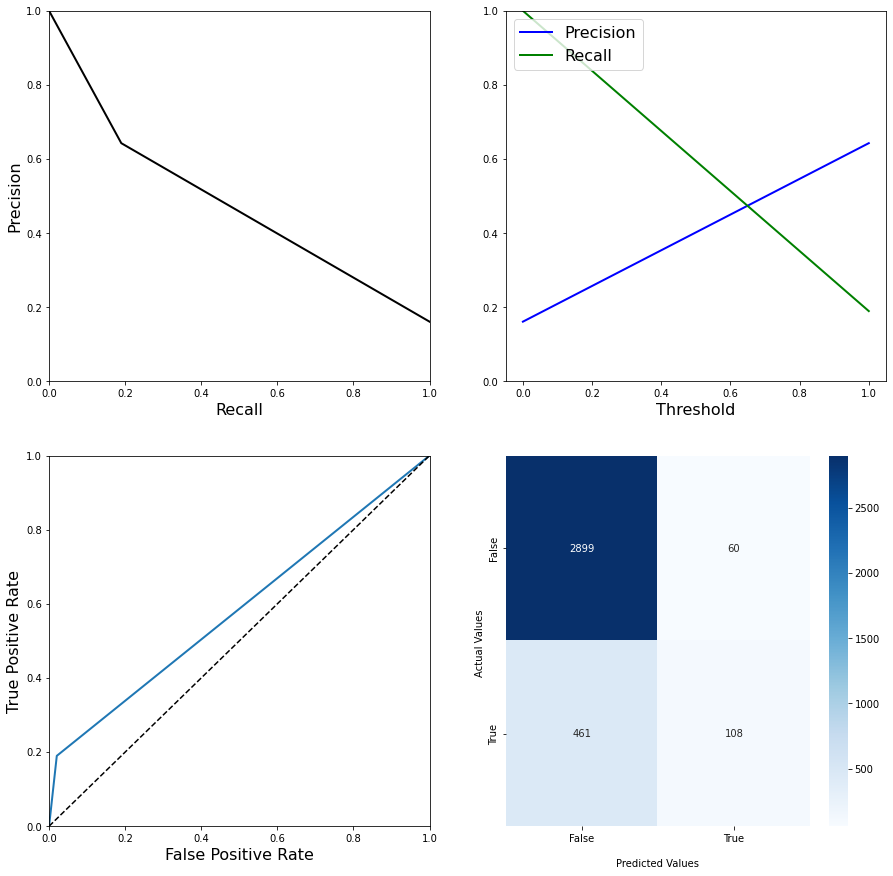

AUC of the ROC Curve is : 0.5847647788671302
F1 of the this model is : 0.8523242630385488
F_beta of the this model is : 0.8523242630385487


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict")
data_models_comparison['Model'].append("LinearSVC")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

On remarque que le score F1 a bien augment√©, et est maintenant √† 0,85. C'est un bon score mais nous allons tenter de faire mieux, en testant d'autres mod√®les. Nous allons √©galement tester notre mod√®le sur le jeu d'entra√Ænement √©thique (ne contenant pas les variables √©thiquement discutables), afin de voir si cela a un impact.

#### Avec le jeu de donn√©es √©thique


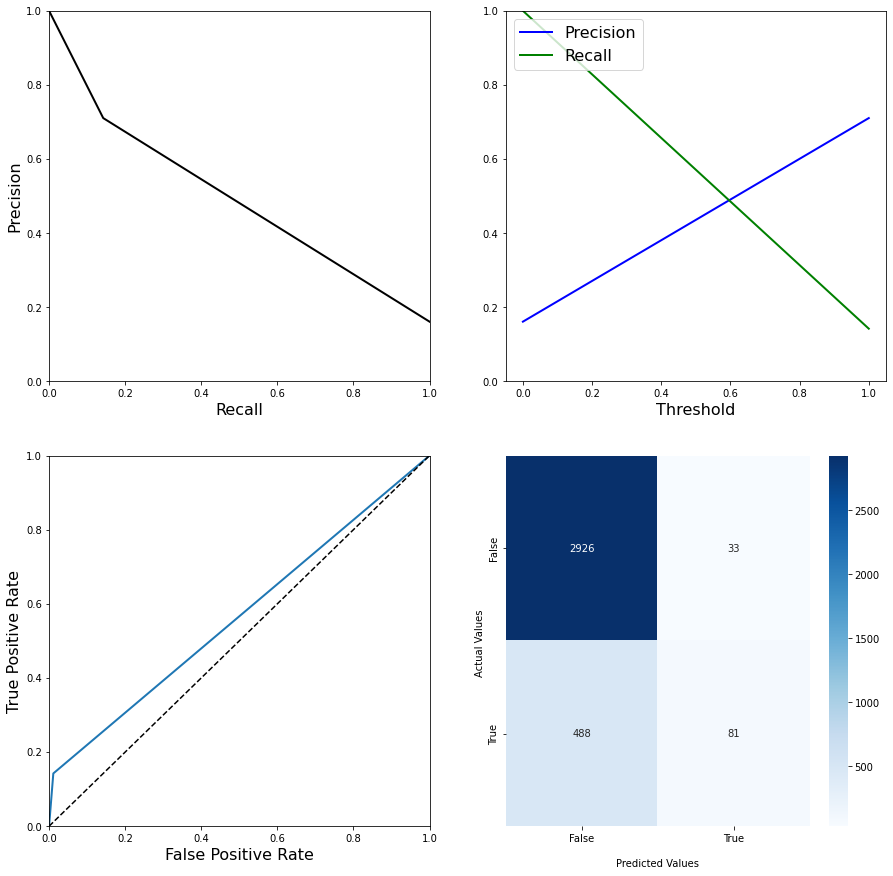

AUC of the ROC Curve is : 0.5656012962152344
F1 of the this model is : 0.8523242630385488
F_beta of the this model is : 0.8523242630385487


In [ ]:
lin_svc_clf = LinearSVC(max_iter=500, random_state=264)
lin_svc_clf.fit(X=X_train_ethical,y=y_label)

param_distribs = {
        'max_iter': [randint(10, 500) for _ in range(20)],
    }

rd_search = RandomizedSearchCV(lin_svc_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result_ethical = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict")
data_models_ethical_comparison['Model'].append("LinearSVC")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

Les m√©triques sont sensiblement identiques. Le mod√®le est donc capable d'√™tre performant sans les attributs √©thiques.

### Mod√®le 2 : Bagging Classifier

On r√©p√®te le processus avec un autre mod√®le, Bagging. Ayant d√©taill√© ci-avant le processus d'entra√Ænement d'un mod√®le et d'am√©lioration de celui-ci gr√¢ce au "Parameter Tuning", nous r√©utilisons directement cette technique pour les nouveaux mod√®les impl√©ment√©s, afin de gagner du temps.

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier


bg_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=264)
bg_clf.fit(X_train_non_ethical, y_label)

param_distribs = {
        'n_estimators': [randint(1, 20) for _ in range(5)],
    }
rd_search = RandomizedSearchCV(bg_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)

RandomizedSearchCV(estimator=BaggingClassifier(base_estimator=SVC(),
                                               random_state=264),
                   param_distributions={'n_estimators': [16, 2, 5, 11, 9]},
                   return_train_score=True)

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'n_estimators': 5}
BaggingClassifier(base_estimator=SVC(), n_estimators=5, random_state=264)


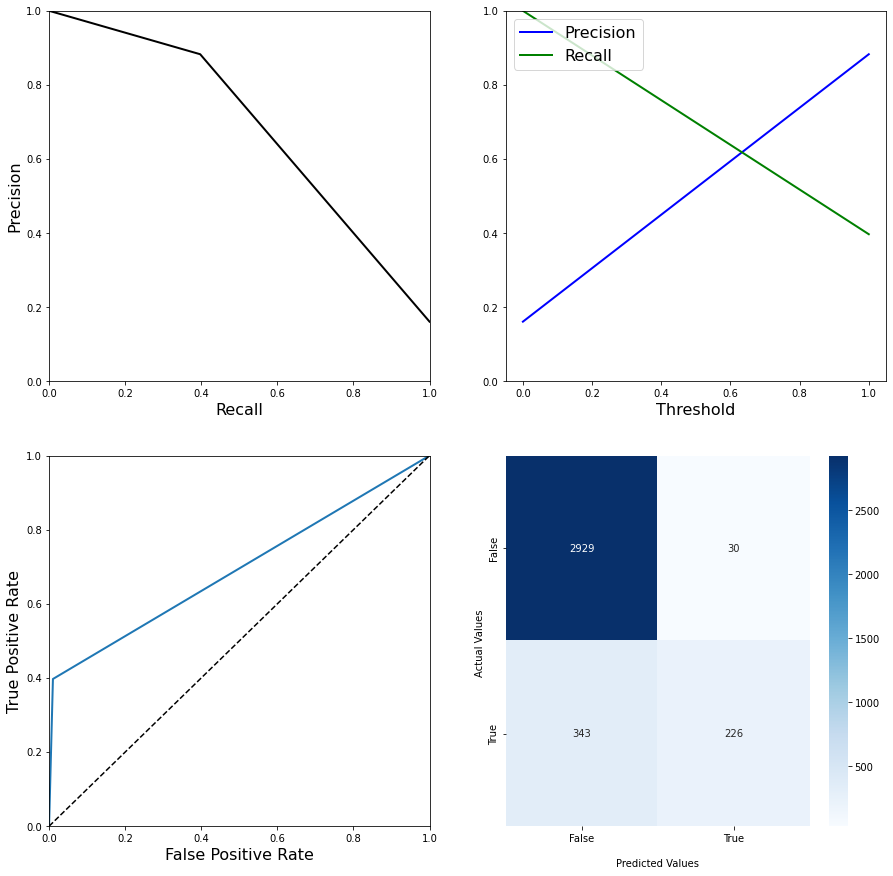

AUC of the ROC Curve is : 0.6935247444423525
F1 of the this model is : 0.8942743764172335
F_beta of the this model is : 0.8942743764172333


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict")
data_models_comparison['Model'].append("SVC")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1 est plus √©lev√© que le Linear SVC. 

#### Avec le jeu de donn√©es √©thique

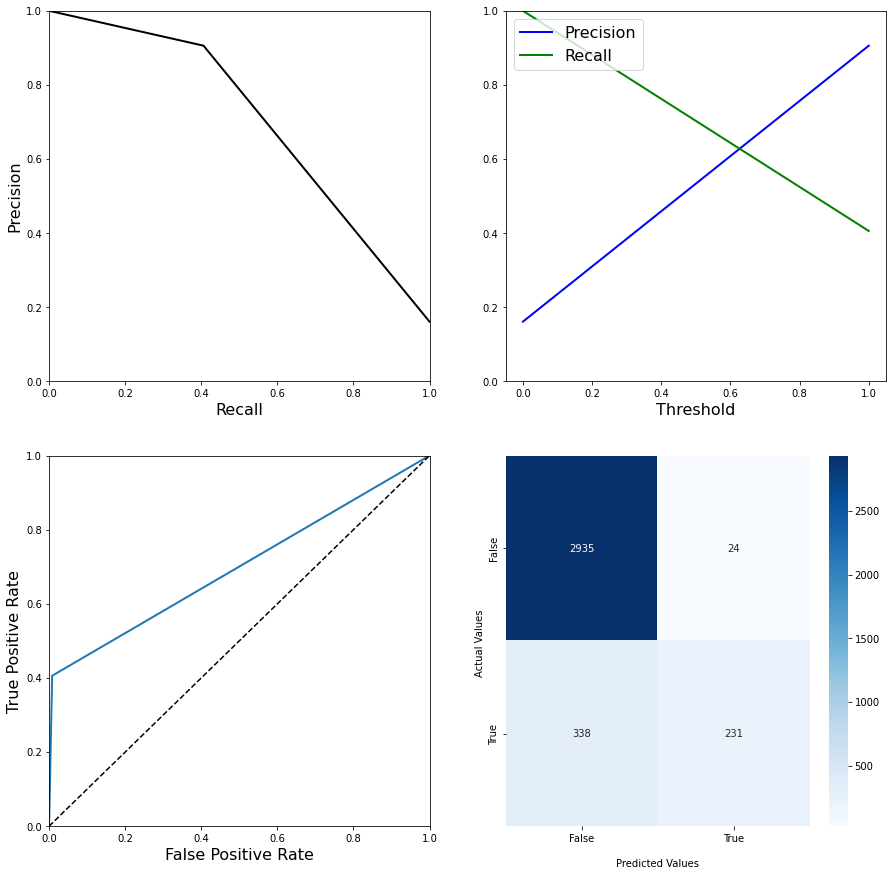

AUC of the ROC Curve is : 0.6989322735855165
F1 of the this model is : 0.8973922902494331
F_beta of the this model is : 0.897392290249433


In [ ]:
bg_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=264)
bg_clf.fit(X_train_ethical, y_label)
param_distribs = {
        'n_estimators': [randint(1, 20) for _ in range(5)],
    }
rd_search = RandomizedSearchCV(bg_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict")
data_models_ethical_comparison['Model'].append("SVC")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

L'AUC est plus faible que sur le jeu non √©thique. Le F1 reste similaire.

### Mod√®le 3 : KNNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier(n_neighbors=1)
neigh_clf.fit(X=X_train_non_ethical,y=y_label)

param_distribs = {
        'n_neighbors': [randint(0, 20) for _ in range(25)],
    }
rd_search = RandomizedSearchCV(neigh_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)

RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
                   param_distributions={'n_neighbors': [8, 14, 8, 20, 5, 0, 4,
                                                        12, 3, 18, 6, 19, 6, 16,
                                                        17, 12, 7, 17, 14, 12,
                                                        15, 14, 13, 18, 3]},
                   return_train_score=True)

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


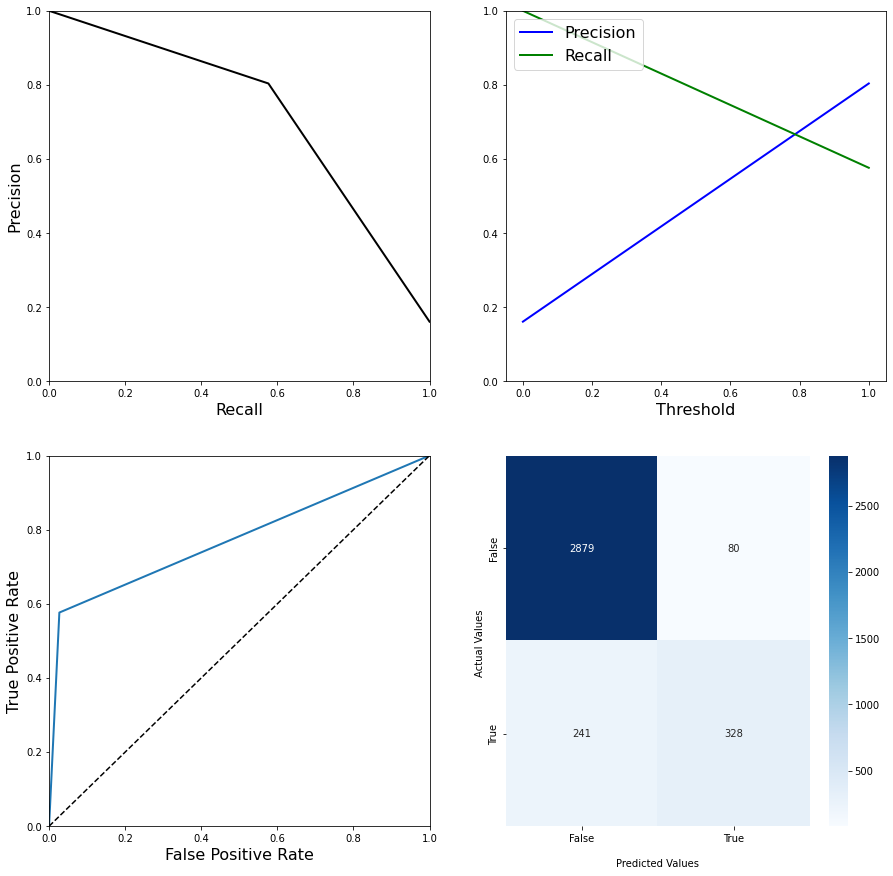

AUC of the ROC Curve is : 0.7747068756306902
F1 of the this model is : 0.909013605442177
F_beta of the this model is : 0.9090136054421769


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict")
data_models_comparison['Model'].append("KNeighborsClassifier")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

L√† encore, le score F1 augmente. Le mod√®le semble mieux se comporter sur nos donn√©es que les pr√©c√©dents. Nous en testons d'autres.

#### Avec le jeu de donn√©es √©thique

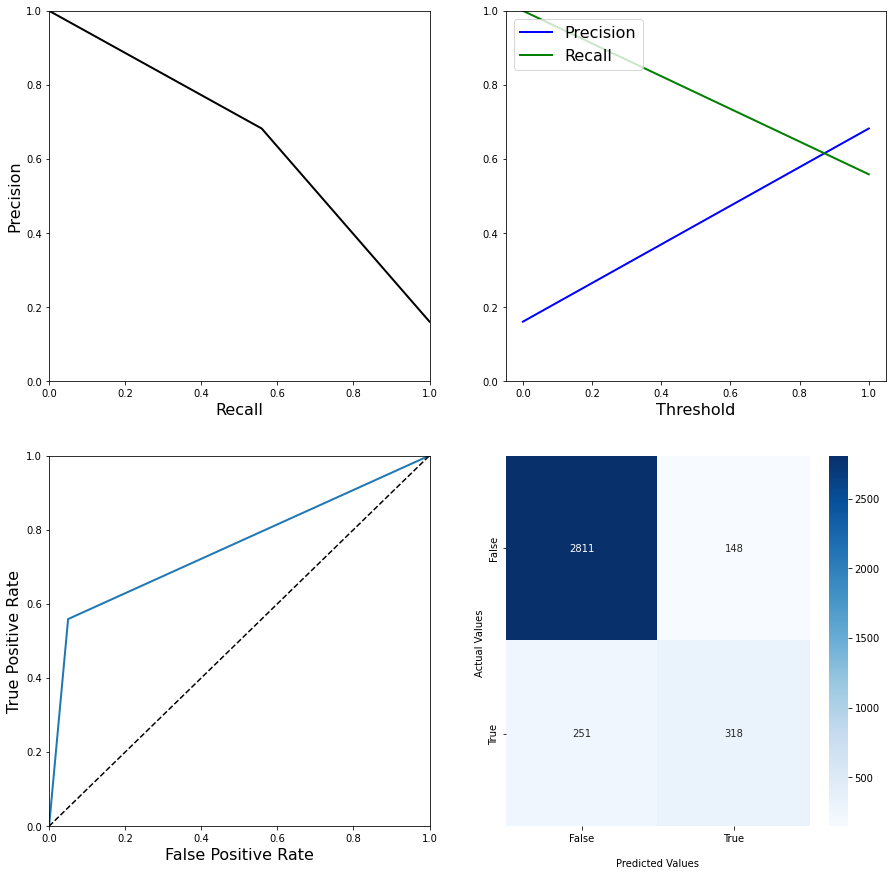

AUC of the ROC Curve is : 0.7544291610415573
F1 of the this model is : 0.8869047619047619
F_beta of the this model is : 0.8869047619047619


In [ ]:
neigh_clf = KNeighborsClassifier(n_neighbors=1)
neigh_clf.fit(X=X_train_ethical,y=y_label)

param_distribs = {
        'n_neighbors': [randint(0, 20) for _ in range(25)],
    }
rd_search = RandomizedSearchCV(neigh_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict")
data_models_ethical_comparison['Model'].append("KNeighborsClassifier")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

Ici, le mod√®le se comporte moins bien sur le jeu de donn√©es √©thique. 

### Mod√®le 4 : DecisionTree Classifier

In [ ]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_features=16, max_depth=7, random_state=264)
tree_clf.fit(X_train_non_ethical, y_label)

param_distribs = {
        'max_depth': [randint(1, 80) for _ in range(5)],
        'max_features': [randint(1, 47) for _ in range(5)],
    }
rd_search = RandomizedSearchCV(tree_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=7,
                                                    max_features=16,
                                                    random_state=264),
                   param_distributions={'max_depth': [29, 43, 19, 35, 65],
                                        'max_features': [45, 23, 2, 25, 43]},
                   return_train_score=True)

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'max_features': 43, 'max_depth': 43}
DecisionTreeClassifier(max_depth=43, max_features=43, random_state=264)


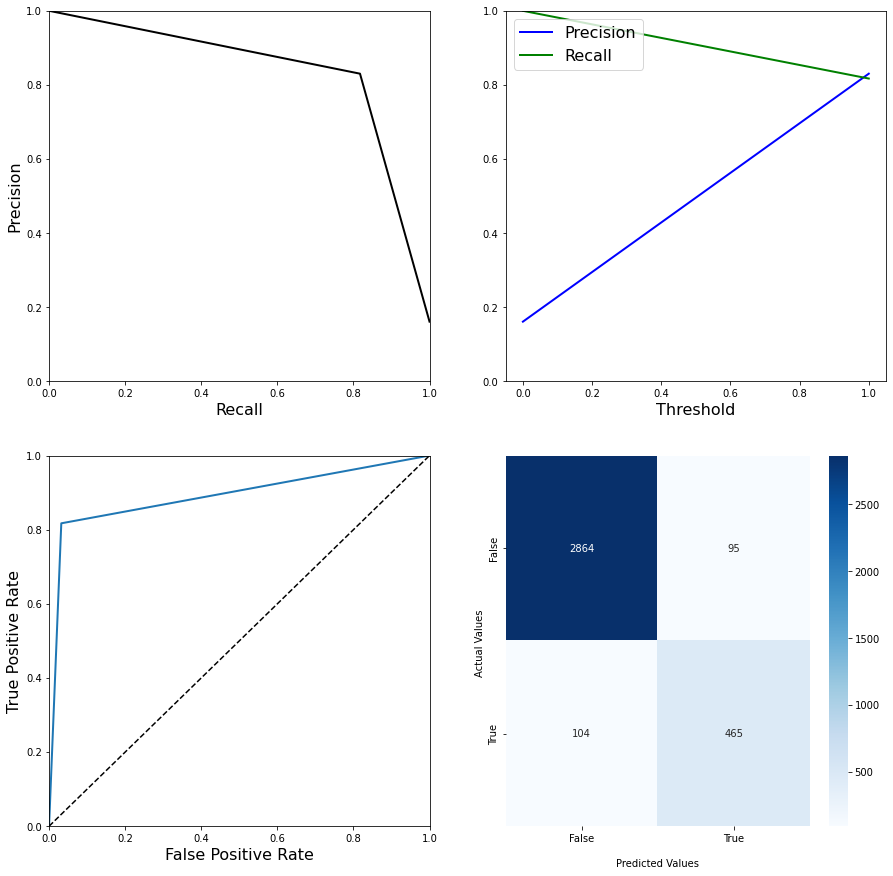

AUC of the ROC Curve is : 0.8925588787833252
F1 of the this model is : 0.94359410430839
F_beta of the this model is : 0.9435941043083899


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict_proba")
data_models_comparison['Model'].append("DecisionTreeClassifier")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1 est tr√®s bon, l√©g√®rement moins que le mod√®le pr√©c√©dent. Nous testons un dernier mod√®le bas√© sur des DecisionTree, le RandomForest.

#### Avec le jeu de donn√©es √©thique

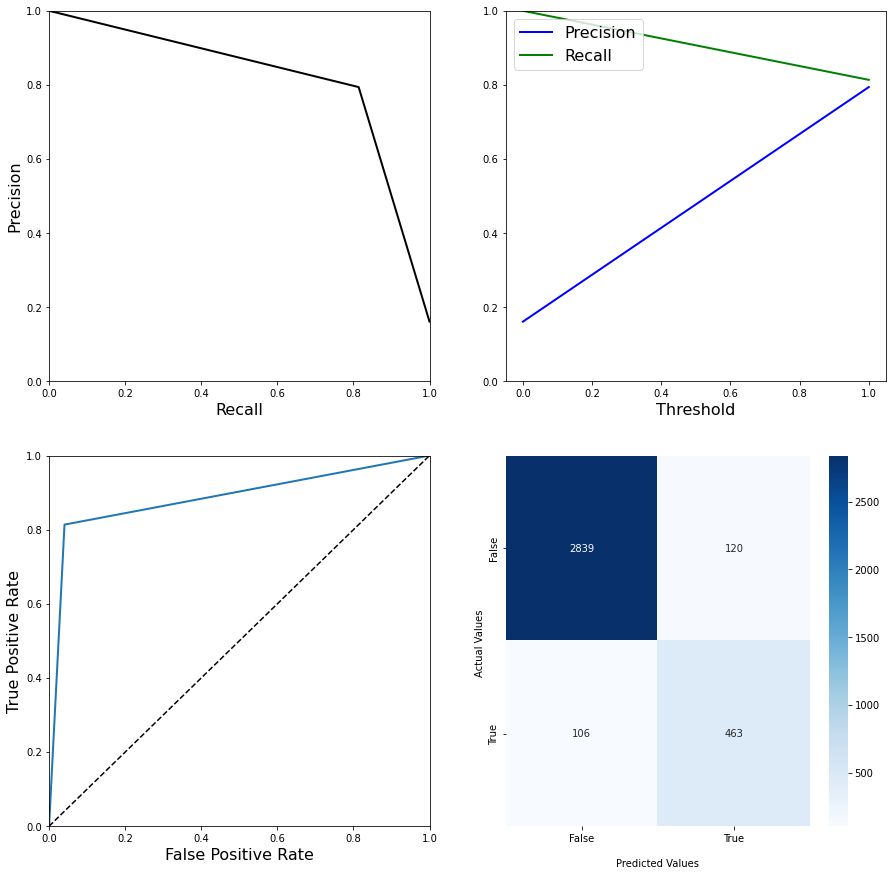

AUC of the ROC Curve is : 0.8865770094038562
F1 of the this model is : 0.9359410430839002
F_beta of the this model is : 0.9359410430839001


In [ ]:
tree_clf = tree.DecisionTreeClassifier(max_features=16, max_depth=7, random_state=264)
tree_clf.fit(X_train_ethical, y_label)

param_distribs = {
        'max_depth': [randint(1, 80) for _ in range(5)],
        'max_features': [randint(1, 47) for _ in range(5)],
    }
rd_search = RandomizedSearchCV(tree_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict_proba")
data_models_ethical_comparison['Model'].append("DecisionTreeClassifier")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

### Mod√®le 5 : RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdmfrst_clf = RandomForestClassifier(n_estimators=105, max_features=16, max_depth=7, random_state=264)
rdmfrst_clf.fit(X_train_non_ethical, y_label)



RandomForestClassifier(max_depth=7, max_features=16, n_estimators=105,
                       random_state=264)

In [ ]:


param_distribs = {
        'n_estimators': [randint(1, 350) for _ in range(20)],
        'max_features': [randint(1, 47) for _ in range(20)],
        'max_depth': [randint(1, 40) for _ in range(20)]
    }
rd_search = RandomizedSearchCV(rdmfrst_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)

RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=7,
                                                    max_features=16,
                                                    n_estimators=105,
                                                    random_state=264),
                   param_distributions={'max_depth': [22, 7, 38, 20, 19, 37, 33,
                                                      10, 22, 14, 20, 1, 1, 23,
                                                      32, 15, 16, 18, 1, 3],
                                        'max_features': [39, 8, 17, 10, 27, 29,
                                                         47, 44, 16, 7, 6, 8,
                                                         46, 23, 43, 12, 40, 30,
                                                         4, 11],
                                        'n_estimators': [272, 154, 96, 23, 54,
                                                         70, 252, 321, 268, 115,
                       

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'n_estimators': 321, 'max_features': 30, 'max_depth': 37}
RandomForestClassifier(max_depth=37, max_features=30, n_estimators=321,
                       random_state=264)


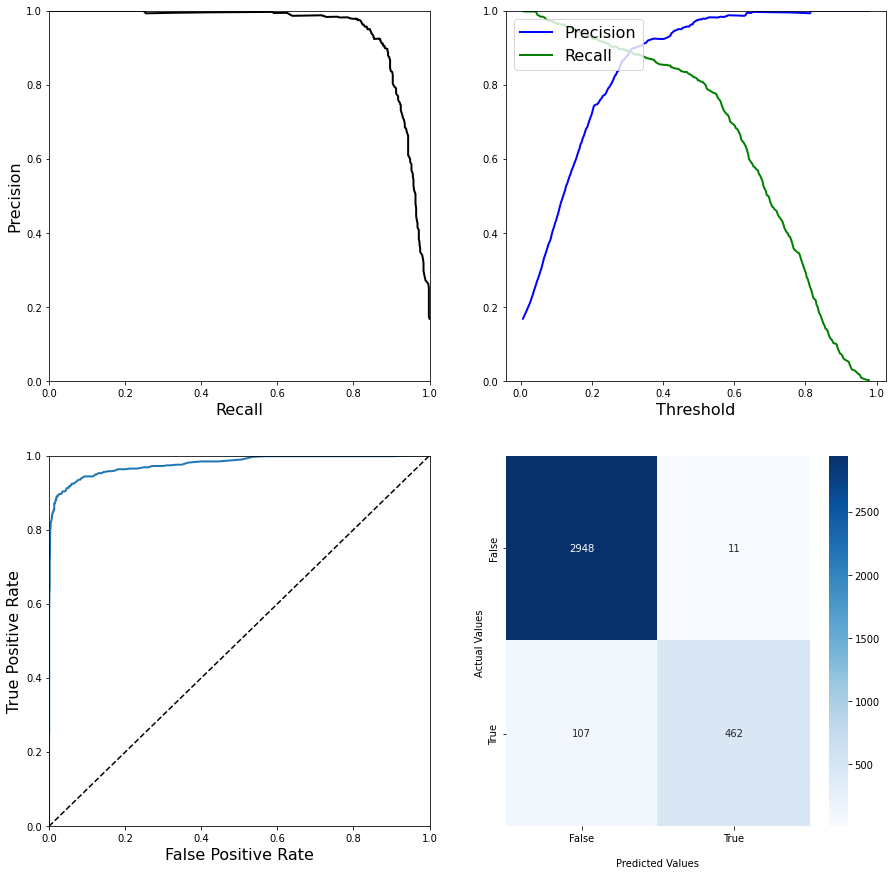

AUC of the ROC Curve is : 0.9776075610971501
F1 of the this model is : 0.9665532879818595
F_beta of the this model is : 0.9665532879818594


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict_proba")
data_models_comparison['Model'].append("RandomForestClassifier")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])
#crossValidate(rd_search.best_estimator_, data_prepared, y_label, 3, make_plot=True)

Le score F1 est l√† aussi tr√®s bon. On note que le nombre faux n√©gatifs est relativement faible. C'est la valeur que l'on cherche √† minimiser d'un point de vue de l'entreprise HumanForYou, c'est tr√®s bon signe sur la fiabilit√© de notre mod√®le. Nous allons tester encore d'autres mod√®les de r√©gression logistique.

#### Avec le jeu de donn√©es √©thique :

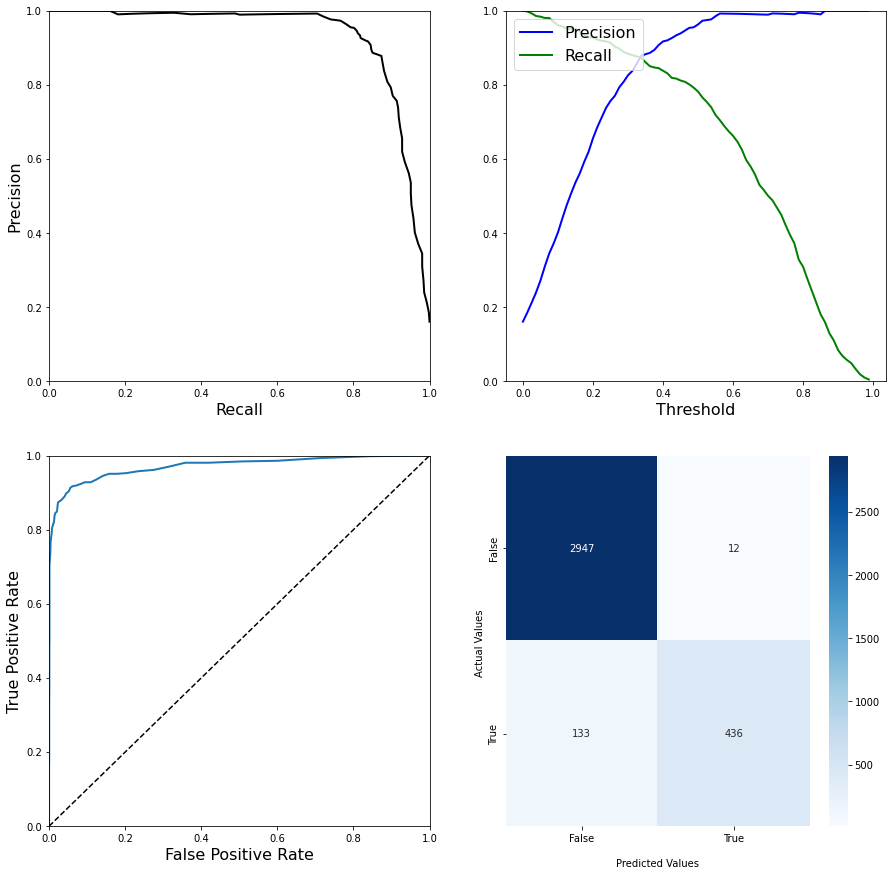

AUC of the ROC Curve is : 0.970889799729282
F1 of the this model is : 0.9589002267573696
F_beta of the this model is : 0.9589002267573695
{'n_estimators': 80, 'max_features': 21, 'max_depth': 24}
RandomForestClassifier(max_depth=24, max_features=21, n_estimators=80,
                       random_state=264)


In [ ]:
rdmfrst_clf = RandomForestClassifier(n_estimators=105, max_features=16, max_depth=7, random_state=264)
rdmfrst_clf.fit(X_train_ethical, y_label)
param_distribs = {
        'n_estimators': [randint(1, 350) for _ in range(20)],
        'max_features': [randint(1, 47) for _ in range(20)],
        'max_depth': [randint(1, 40) for _ in range(20)]
    }
rd_search = RandomizedSearchCV(rdmfrst_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict_proba")
data_models_ethical_comparison['Model'].append("RandomForestClassifier")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])
print(rd_search.best_params_)
print(rd_search.best_estimator_)

Le mod√®le s'adapte √©galement tr√®s bien ici √† un jeu avec des attributs en moins. 

## Entrainement et comparaison de mod√®les de r√©gression logistique

Un employ√© pourrait avoir tendance √† changer ses volont√©s et √† potentiellement partir dans le futur. Dans un objectif de d√©tection plus pr√©cis permettant notamment de d√©tecter des tendances, une r√©gression logistique pourrait √™tre int√©ressante √† impl√©menter. 

Afin de r√©aliser une r√©gression logistique les donn√©es √† pr√©dire doivent √™tre num√©riques. On vient donc convertir les valeurs bool√©ennes en valeurs num√©riques pour la variable cible (Attrition).

In [ ]:
y_label_num = y_label.astype(int)
y_label_test_num = y_label_test.astype(int)

### Mod√®le 6 : R√©gression Lasso

On applique le m√™me processus que pr√©c√©demment avec les mod√®les de r√©gression logistique :

In [ ]:
from sklearn.linear_model import ElasticNetCV
from random import uniform


elastic_regr = ElasticNetCV(cv=5, random_state=264)
elastic_regr.fit(X_train_non_ethical, y_label_num)

param_distribs = {
        'cv': [randint(1, 15) for _ in range(5)],
        'l1_ratio': np.arange(0, 0.12, 0.03),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(elastic_regr, param_distribs, n_iter = 50, cv=5, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label_num)

RandomizedSearchCV(cv=5, estimator=ElasticNetCV(cv=5, random_state=264),
                   n_iter=50,
                   param_distributions={'cv': [11, 12, 11, 4, 8],
                                        'l1_ratio': array([0.  , 0.03, 0.06, 0.09])},
                   return_train_score=True)

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'l1_ratio': 0.03, 'cv': 8}
ElasticNetCV(cv=8, l1_ratio=0.03, random_state=264)


Error since this is not a classifier
Recalculating results as positives and negatives...


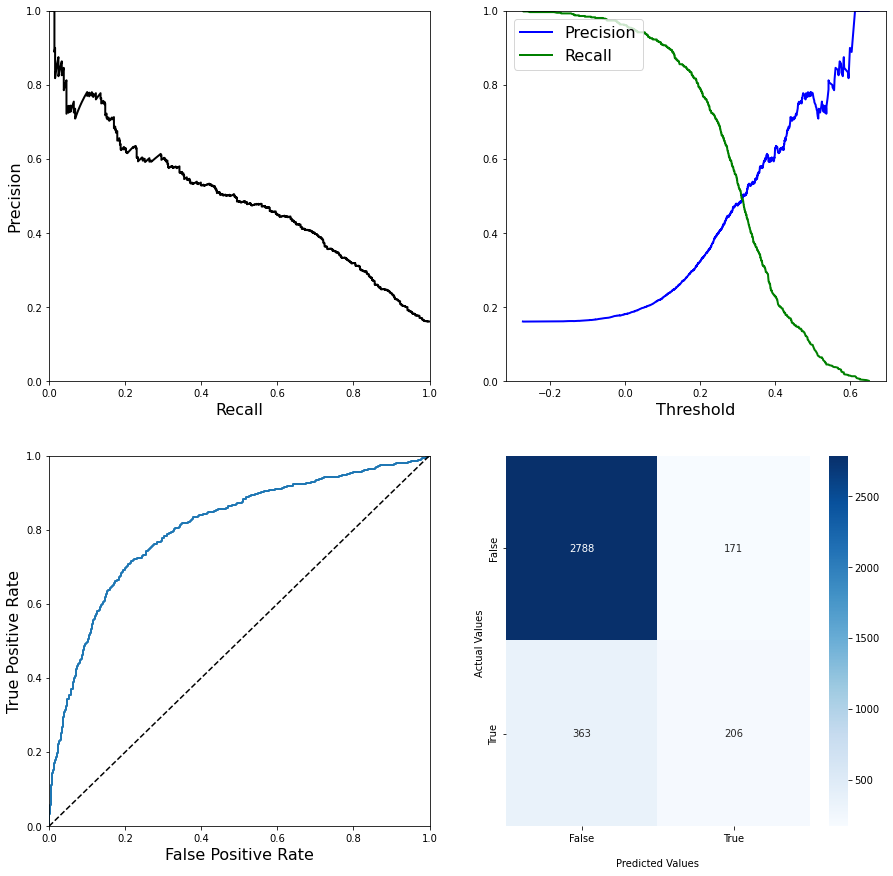

AUC of the ROC Curve is : 0.8043911191675809
F1 of the this model is : 0.8486394557823129
F_beta of the this model is : 0.8486394557823129


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label_num, 5, make_plot=True, method="predict", treshold_reg=0.35)
data_models_comparison['Model'].append("Lasso")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1 est moins bon que certains algorithmes de classification pr√©c√©demment impl√©ment√©s. Continuons avec d'autres mod√®les. Le nombre de faux n√©gatifs est assez important. Puisque nous faisons de la r√©gression, on vient calculer une autre m√©trique, RMSE (Root Mean Squared Error) : 

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = cross_val_predict(rd_search.best_estimator_, X_train_non_ethical, y_label_num, cv=10)
mean_squared_error(y_label_num, y_pred)

0.11311814941986864

RMSE est la racine carr√©e de la variance des r√©sidus (√©cart-type). Plus elle est faible, plus le mod√®le s'adapte √† nos donn√©es. Ici le r√©sultat obtenu est relativement faible. Nous allons le comparer √† celui obtenu sur le jeu √©thique, et sur les autres mod√®les de r√©gression logistique. 

#### Avec le jeu de donn√©es √©thique : 

Error since this is not a classifier
Recalculating results as positives and negatives...


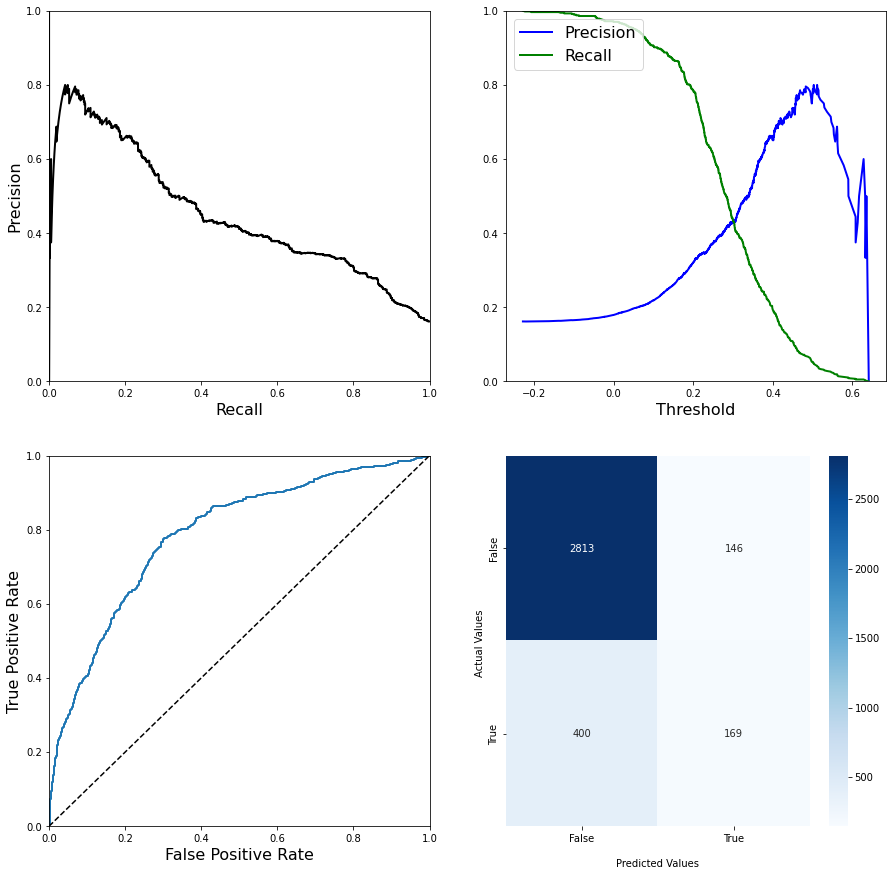

AUC of the ROC Curve is : 0.7869168026294924
F1 of the this model is : 0.8452380952380952
F_beta of the this model is : 0.8452380952380952


In [ ]:
elastic_regr = ElasticNetCV(cv=5, random_state=264)
elastic_regr.fit(X_train_ethical, y_label_num)

param_distribs = {
        'cv': [randint(1, 15) for _ in range(5)],
        'l1_ratio': np.arange(0, 0.12, 0.03),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(elastic_regr, param_distribs, n_iter = 50, cv=5, return_train_score=True)
rd_search.fit(X_train_ethical, y_label_num)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label_num, 5, make_plot=True, method="predict", treshold_reg=0.35)
data_models_ethical_comparison['Model'].append("Lasso")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

In [ ]:
y_pred = cross_val_predict(rd_search.best_estimator_, X_train_ethical, y_label_num, cv=10)
mean_squared_error(y_label_num, y_pred)

0.1162110430476013

Les indicateurs sont sensiblement identiques, le mod√®le s'adapte bien. Nous tentons d'autres mod√®les de r√©gression. 

### Mod√®le 7 : R√©gression Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge_regr = Ridge( random_state=264)
ridge_regr.fit(X_train_non_ethical, y_label_num)

param_distribs = {
        'alpha': np.arange(0, 1, 0.05),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(ridge_regr, param_distribs, n_iter = 100, cv=5, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label_num)

RandomizedSearchCV(cv=5, estimator=Ridge(random_state=264), n_iter=100,
                   param_distributions={'alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
                   return_train_score=True)

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'alpha': 0.9500000000000001}
Ridge(alpha=0.9500000000000001, random_state=264)


Error since this is not a classifier
Recalculating results as positives and negatives...


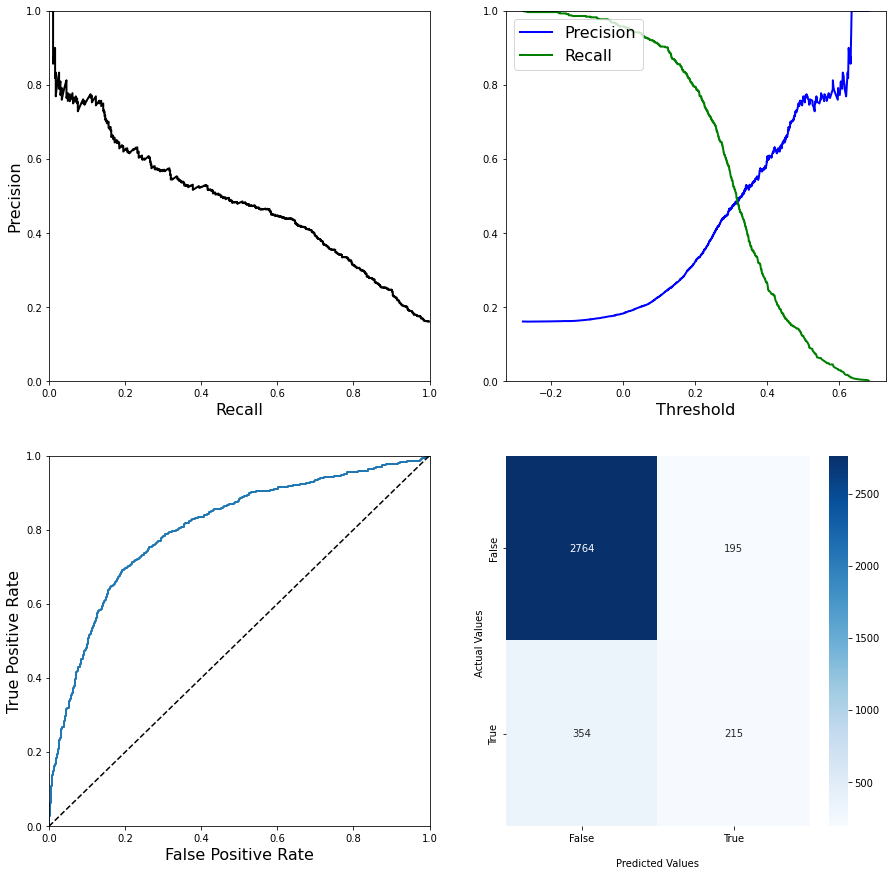

AUC of the ROC Curve is : 0.8039171548360695
F1 of the this model is : 0.8443877551020407
F_beta of the this model is : 0.8443877551020408


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label_num, 5, make_plot=True, method="predict", treshold_reg=0.35)
data_models_comparison['Model'].append("Ridge")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1 est sensiblement identique au mod√®le pr√©c√©dent, tout comme la RMSE : 

In [ ]:
y_pred = cross_val_predict(rd_search.best_estimator_, X_train_non_ethical, y_label_num, cv=10)
mean_squared_error(y_label_num, y_pred)

0.11322743297126757

#### Avec le jeu de donn√©es √©thique :

Error since this is not a classifier
Recalculating results as positives and negatives...


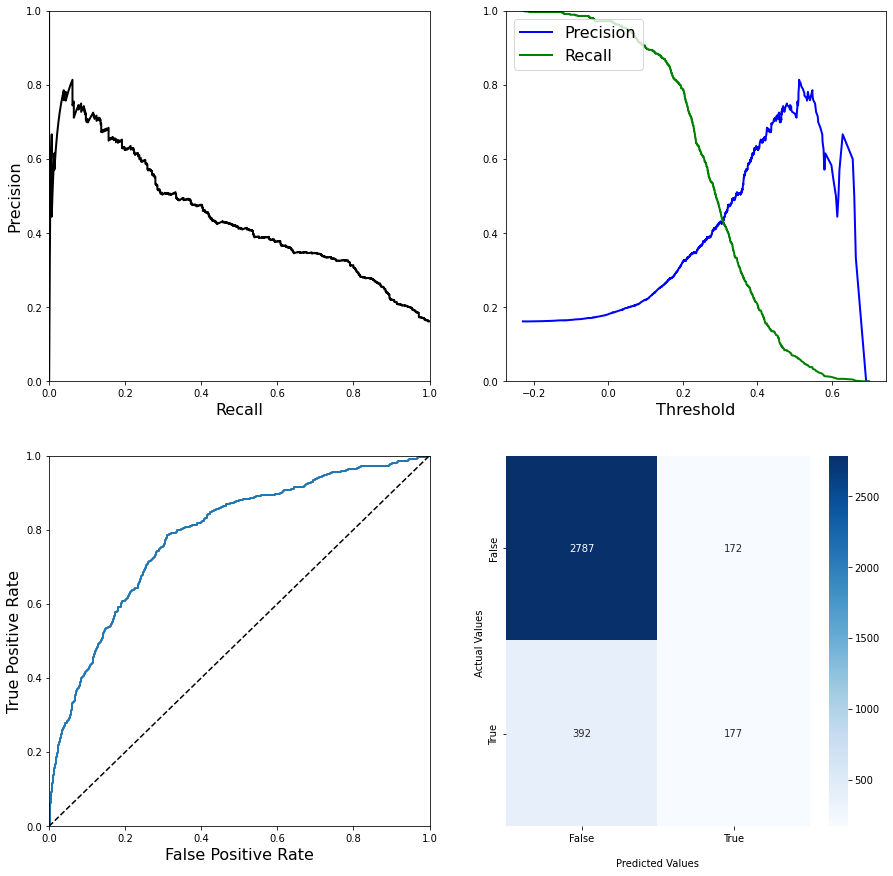

AUC of the ROC Curve is : 0.7860152013071436
F1 of the this model is : 0.8401360544217686
F_beta of the this model is : 0.8401360544217686


In [ ]:
ridge_regr = Ridge( random_state=264)
ridge_regr.fit(X_train_ethical, y_label_num)

param_distribs = {
        'alpha': np.arange(0, 1, 0.05),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(ridge_regr, param_distribs, n_iter = 100, cv=5, return_train_score=True)
rd_search.fit(X_train_ethical, y_label_num)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label_num, 5, make_plot=True, method="predict", treshold_reg=0.35)
data_models_ethical_comparison['Model'].append("Ridge")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

In [ ]:
y_pred = cross_val_predict(rd_search.best_estimator_, X_train_ethical, y_label_num, cv=10)
mean_squared_error(y_label_num, y_pred)

0.11627395948552345

### Mod√®le 8 : R√©gression SVR

In [ ]:
from sklearn.svm import SVR

SVR_regr = SVR(C=1.0, epsilon=0.2, kernel="rbf")
SVR_regr.fit(X_train_non_ethical, y_label_num)

param_distribs = {
        'C': np.arange(0, 1, 0.05),
        'epsilon': np.arange(0, 0.5, 0.01),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(SVR_regr, param_distribs, n_iter = 40, cv=5, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label_num)

RandomizedSearchCV(cv=5, estimator=SVR(epsilon=0.2), n_iter=40,
                   param_distributions={'C': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'epsilon': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49])},
                   return_train_score=True)

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'epsilon': 0.12, 'C': 0.8500000000000001}
SVR(C=0.8500000000000001, epsilon=0.12)


Error since this is not a classifier
Recalculating results as positives and negatives...


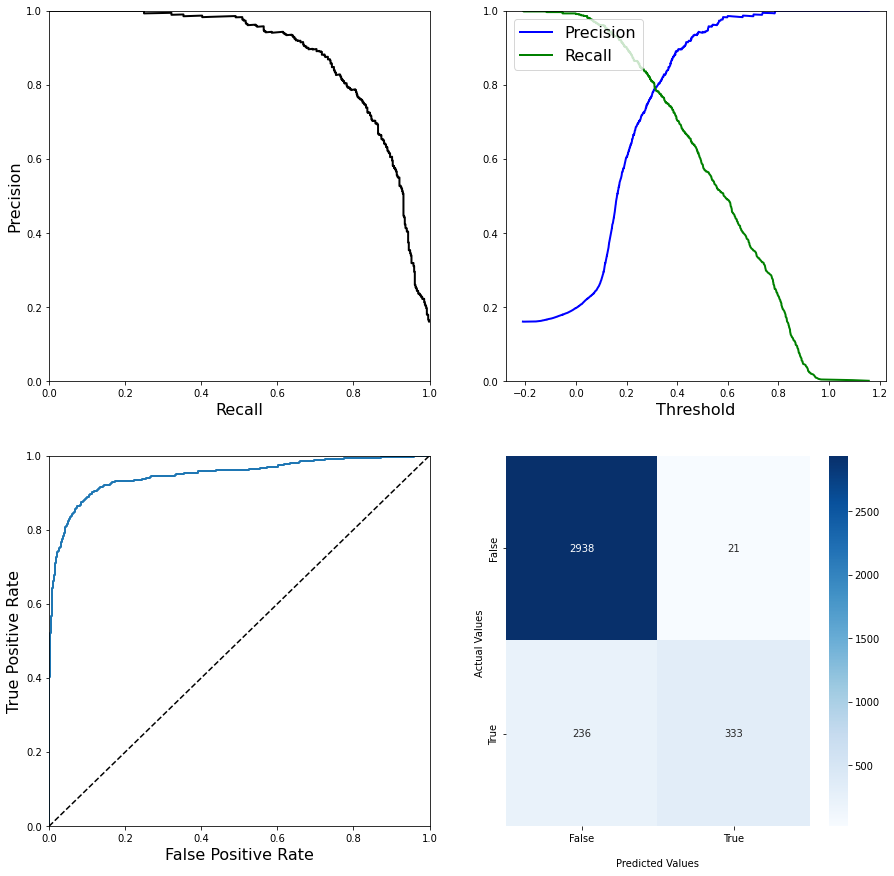

AUC of the ROC Curve is : 0.9478193780138757
F1 of the this model is : 0.9271541950113379
F_beta of the this model is : 0.9271541950113379


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label_num, 5, make_plot=True, method="predict")
data_models_comparison['Model'].append("SVR")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

In [ ]:
y_pred = cross_val_predict(rd_search.best_estimator_, X_train_non_ethical, y_label_num, cv=10)
mean_squared_error(y_label_num, y_pred)

0.054981769629584724

Le score F1 est tr√®s bon et la RMSE est excellente. Testons sur le jeu de donn√©es √©thique.

#### Avec le jeu de donn√©es √©thique :

Error since this is not a classifier
Recalculating results as positives and negatives...


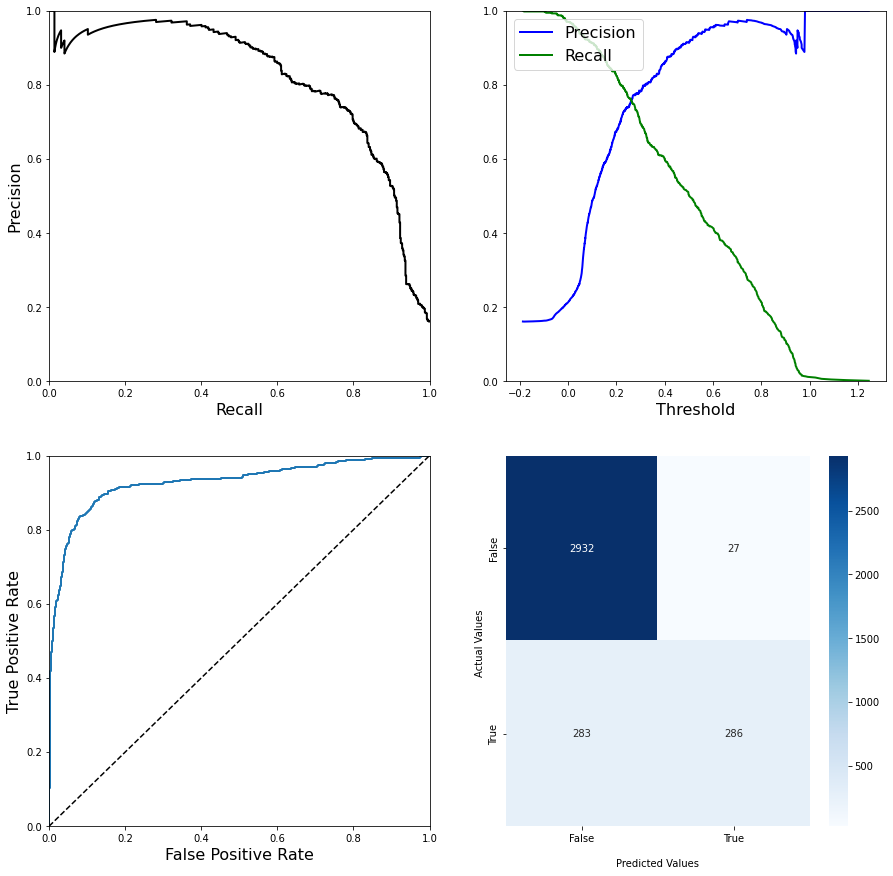

AUC of the ROC Curve is : 0.9280560156942778
F1 of the this model is : 0.9121315192743764
F_beta of the this model is : 0.9121315192743764


In [ ]:
SVR_regr = SVR(C=1.0, epsilon=0.2, kernel="rbf")
SVR_regr.fit(X_train_ethical, y_label_num)

param_distribs = {
        'C': np.arange(0, 1, 0.05),
        'epsilon': np.arange(0, 0.5, 0.01),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(SVR_regr, param_distribs, n_iter = 40, cv=5, return_train_score=True)
rd_search.fit(X_train_ethical, y_label_num)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label_num, 5, make_plot=True, method="predict")
data_models_ethical_comparison['Model'].append("SVR")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

In [ ]:
y_pred = cross_val_predict(rd_search.best_estimator_, X_train_ethical, y_label_num, cv=10)
mean_squared_error(y_label_num, y_pred)

0.061021325319387545

Les m√©triques sont tr√®s bonnes, le mod√®le s'adapte bien. Testons un dernier mod√®le.

### Mod√®le 9 : R√©gression RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rdmfrst_regr = RandomForestRegressor(n_estimators=105, max_features=16, max_depth=7, random_state=264)
rdmfrst_regr.fit(X_train_non_ethical, y_label_num)

param_distribs = {
        'n_estimators': [randint(1, 350) for _ in range(15)],
        'max_features': [randint(1, 47) for _ in range(15)],
        'max_depth': [randint(1, 40) for _ in range(15)]
    }
rd_search = RandomizedSearchCV(rdmfrst_regr, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label_num)

RandomizedSearchCV(estimator=RandomForestRegressor(max_depth=7, max_features=16,
                                                   n_estimators=105,
                                                   random_state=264),
                   param_distributions={'max_depth': [40, 13, 15, 6, 26, 9, 25,
                                                      40, 13, 26, 31, 33, 6, 23,
                                                      20],
                                        'max_features': [41, 9, 23, 19, 41, 1,
                                                         46, 9, 4, 27, 30, 4,
                                                         32, 6, 37],
                                        'n_estimators': [8, 136, 110, 79, 16,
                                                         83, 168, 104, 251, 168,
                                                         314, 277, 46, 163,
                                                         155]},
                   return_train_sco

{'n_estimators': 163, 'max_features': 1, 'max_depth': 23}
RandomForestRegressor(max_depth=23, max_features=1, n_estimators=163,
                      random_state=264)
Error since this is not a classifier
Recalculating results as positives and negatives...


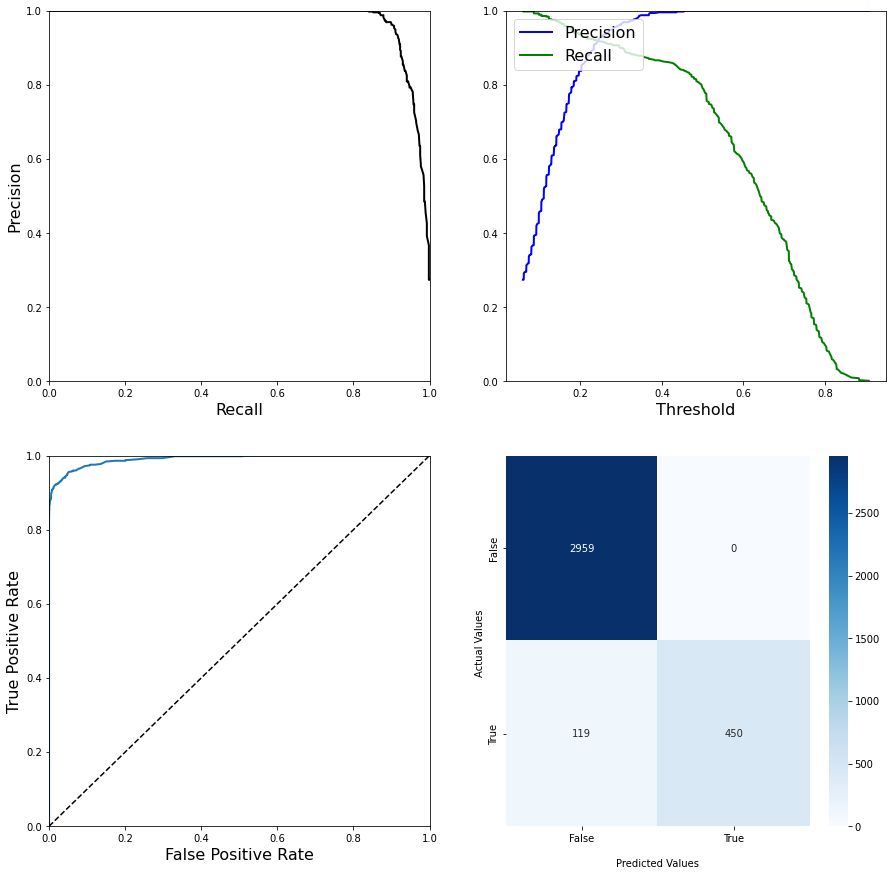

AUC of the ROC Curve is : 0.9911208900076085
F1 of the this model is : 0.9662698412698413
F_beta of the this model is : 0.9662698412698412


In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label_num, 5, make_plot=True, method="predict")

In [ ]:
data_models_comparison['Model'].append("RandomForestRegressor")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

In [ ]:
y_pred = cross_val_predict(rd_search.best_estimator_, X_train_non_ethical, y_label_num, cv=10)
mean_squared_error(y_label_num, y_pred)

0.0315318683229

Notre mod√®le semble tr√®s performant ! V√©rifions sur le jeu √©thique.

#### Avec le jeu de donn√©es √©thique :

{'n_estimators': 255, 'max_features': 29, 'max_depth': 26}
RandomForestRegressor(max_depth=26, max_features=29, n_estimators=255,
                      random_state=264)
Error since this is not a classifier
Recalculating results as positives and negatives...


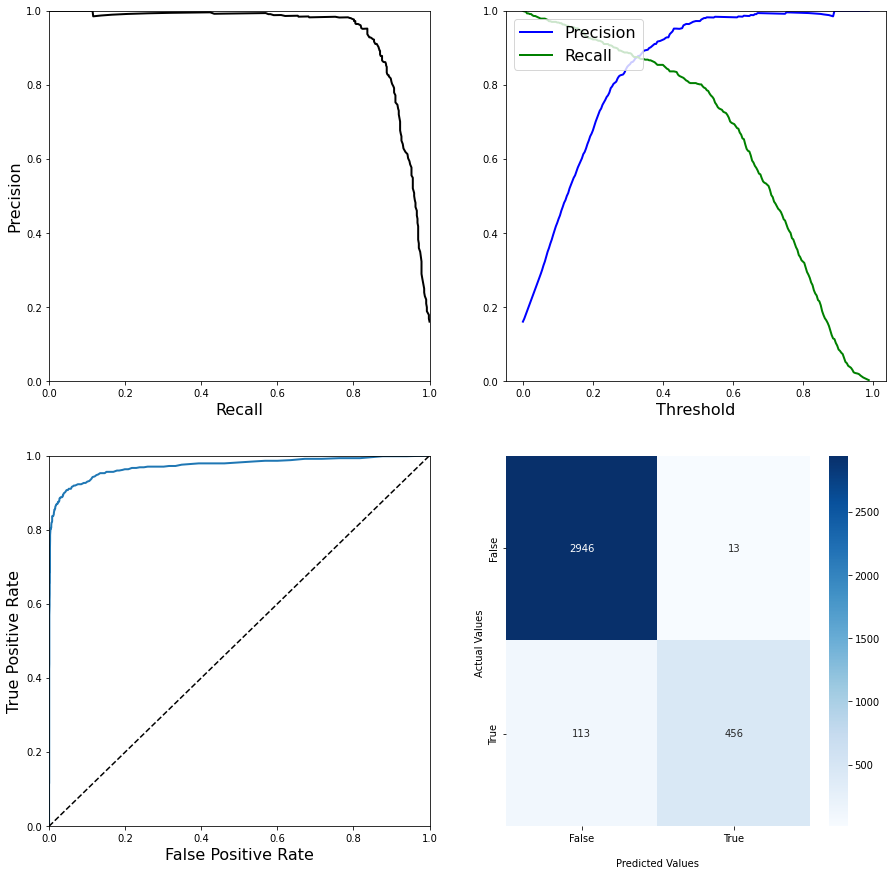

AUC of the ROC Curve is : 0.9721661773588783
F1 of the this model is : 0.9642857142857143
F_beta of the this model is : 0.9642857142857142


In [ ]:
rdmfrst_regr = RandomForestRegressor(n_estimators=105, max_features=16, max_depth=7, random_state=264)
rdmfrst_regr.fit(X_train_ethical, y_label_num)

param_distribs = {
        'n_estimators': [randint(1, 350) for _ in range(15)],
        'max_features': [randint(1, 47) for _ in range(15)],
        'max_depth': [randint(1, 40) for _ in range(15)]
    }
rd_search = RandomizedSearchCV(rdmfrst_regr, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label_num)
print(rd_search.best_params_)
print(rd_search.best_estimator_)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label_num, 5, make_plot=True, method="predict")
data_models_ethical_comparison['Model'].append("RandomForestRegressor")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

In [ ]:
y_pred = cross_val_predict(rd_search.best_estimator_, X_train_ethical, y_label_num, cv=10)
mean_squared_error(y_label_num, y_pred)

0.03076653755183991

L√† aussi les performances sont tr√®s bonnes. Nous allons pouvoir comparer nos mod√®les pour en choisir un.

## Comparaison des diff√©rents mod√®les

Pour mieux comprendre les diff√©rents indicateurs disponibles pour chaque mod√®le, un histogramme f√ªt r√©alis√© pour les diff√©rentes variables : AUC, F1 et F_beta

                             AUC        F1    F_beta
LinearSVC               0.584765  0.852324  0.852324
SVC                     0.693525  0.894274  0.894274
KNeighborsClassifier    0.774707  0.909014  0.909014
DecisionTreeClassifier  0.892559  0.943594  0.943594
RandomForestClassifier  0.977608  0.966553  0.966553
Lasso                   0.804391  0.848639  0.848639
Ridge                   0.803917  0.844388  0.844388
SVR                     0.947819  0.927154  0.927154
RandomForestRegressor   0.991121   0.96627   0.96627 



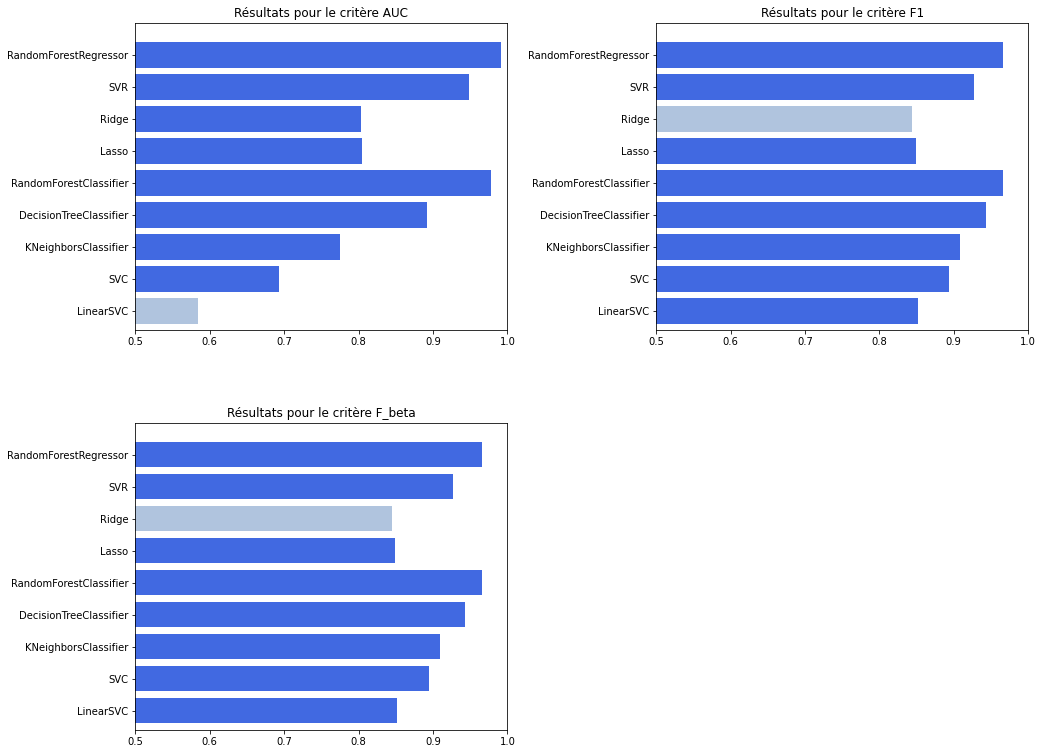

In [ ]:
def plotGraphForIndicators(indicators,data,labels,title,scale=(16,13),colorClassic = 'royalblue',colorMin = 'lightsteelblue', colorMax = 'royalblue',withCriteria=False,rows=2,lines=3,displayIndicatorTable=True):
  plt.figure(figsize=scale) 
  bar_y_pos = np.arange(len(labels))

  if displayIndicatorTable:
    wellDisplayedIndicators = pd.DataFrame(data=[],index=labels,columns=indicators)
    for i in range(0,len(labels)):
      indicatorsRow = {}
      for indicator in indicators:
        indicatorsRow[indicator] = data[indicator][i]  
      wellDisplayedIndicators.iloc[i] = indicatorsRow
    print(wellDisplayedIndicators,'\n')



  for n,criteria in enumerate(indicators):
    ax = plt.subplot(rows,lines, n+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.3)
    colors = []
    for i in range(0,len(labels)):
      if (data_models_comparison[criteria][i] == max(data_models_comparison[criteria])):
        colors.append(colorMax)
      elif (data_models_comparison[criteria][i] == min(data_models_comparison[criteria])):
        colors.append(colorMin)
      else:  
        colors.append(colorClassic)

    plt.barh(labels, data_models_comparison[criteria], color = colors)
    ax.set_yticks(bar_y_pos)
    if withCriteria:
      ax.set_title(title+criteria)
    else:
      ax.set_title(title)
    ax.invert_yaxis()
    plt.axis([0.5, 1.0, -0.6, len(labels)])
    plt.plot(ax=ax)
    

plotGraphForIndicators(
                       indicators            = ['AUC','F1','F_beta'],
                       data                  = data_models_comparison,
                       labels                = data_models_comparison['Model'],
                       scale                 = (16,13),
                       title                 = 'R√©sultats pour le crit√®re ',
                       withCriteria          = True,
                       rows                  = 2,
                       lines                 = 2,
    )

On affiche √©galement une comparaison des mod√®les sur le jeux d'entra√Ænement √©thique :

                             AUC        F1    F_beta
LinearSVC               0.584765  0.852324  0.852324
SVC                     0.698932  0.897392  0.897392
KNeighborsClassifier    0.754429  0.886905  0.886905
DecisionTreeClassifier  0.886577  0.935941  0.935941
RandomForestClassifier   0.97089    0.9589    0.9589
Lasso                   0.786917  0.845238  0.845238
Ridge                   0.786015  0.840136  0.840136
SVR                     0.928056  0.912132  0.912132
RandomForestRegressor   0.972166  0.964286  0.964286 



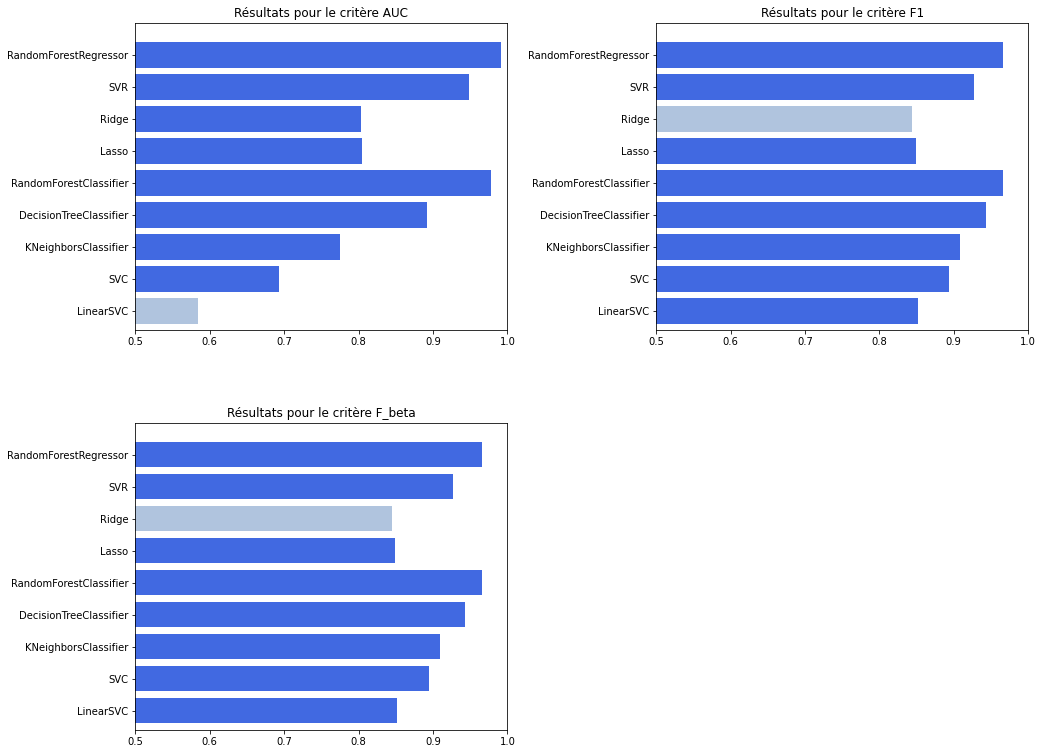

In [ ]:
plotGraphForIndicators(
                       indicators            = ['AUC','F1','F_beta'],
                       data                  = data_models_ethical_comparison,
                       labels                = data_models_ethical_comparison['Model'],
                       scale                 = (16,13),
                       title                 = 'R√©sultats pour le crit√®re ',
                       withCriteria          = True,
                       rows                  = 2,
                       lines                 = 2,
    )

A la lecture de ce tableau et des graphiques associ√©s, o√π on compare les performances des diff√©rents mod√®les impl√©ment√©s, il appara√Æt que le mod√®le obtenant les meilleurs r√©sultats est RandomForest Regressor. Un avantage suppl√©mentaire du Regressor, compar√© au Classifier, est de pouvoir changer le seuil qui d√©finit la classe √† laquelle appartient une valeur. On affiche √©galement une comparaison des courbes ROC :

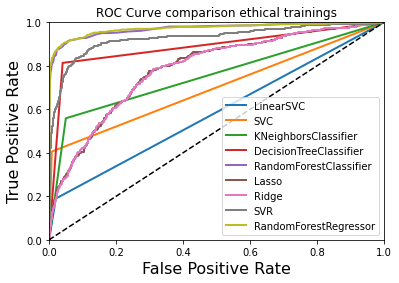

In [ ]:
for i,v in enumerate(data_models_ethical_comparison['fpr']):
  plt.plot(data_models_ethical_comparison['fpr'][i], data_models_ethical_comparison['tpr'][i], linewidth=2, label=data_models_ethical_comparison['Model'][i])
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='best')
plt.title("ROC Curve comparison ethical trainings")
plt.show()

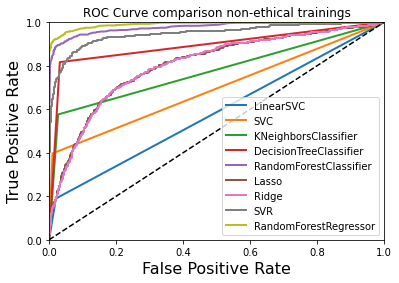

In [ ]:
for i,v in enumerate(data_models_comparison['fpr']):
  plt.plot(data_models_comparison['fpr'][i], data_models_comparison['tpr'][i], linewidth=2, label=data_models_comparison['Model'][i])
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='best')
plt.title("ROC Curve comparison non-ethical trainings")
plt.show()

On applique notre choix sur le jeu de test pour le valider : 

## Application du mod√®le s√©lectionn√© sur le jeu de test

On teste d'abord sur le jeu de test non √©thique :

In [ ]:
rdmfrst_regr = RandomForestRegressor(n_estimators=105, max_features=16, max_depth=7, random_state=264)
rdmfrst_regr.fit(X_train_non_ethical, y_label_num)

param_distribs = {
        'n_estimators': [randint(1, 350) for _ in range(15)],
        'max_features': [randint(1, 39) for _ in range(15)],
        'max_depth': [randint(1, 40) for _ in range(15)]
    }
rd_search = RandomizedSearchCV(rdmfrst_regr, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label_num)

RandomizedSearchCV(estimator=RandomForestRegressor(max_depth=7, max_features=16,
                                                   n_estimators=105,
                                                   random_state=264),
                   param_distributions={'max_depth': [32, 16, 36, 12, 33, 30,
                                                      19, 16, 40, 37, 2, 7, 1,
                                                      7, 32],
                                        'max_features': [16, 35, 17, 4, 26, 13,
                                                         13, 6, 15, 17, 38, 5,
                                                         19, 20, 5],
                                        'n_estimators': [188, 30, 293, 319, 184,
                                                         291, 236, 101, 143, 80,
                                                         15, 221, 348, 63,
                                                         261]},
                   return_train_

Error since this is not a classifier
Recalculating results as positives and negatives...


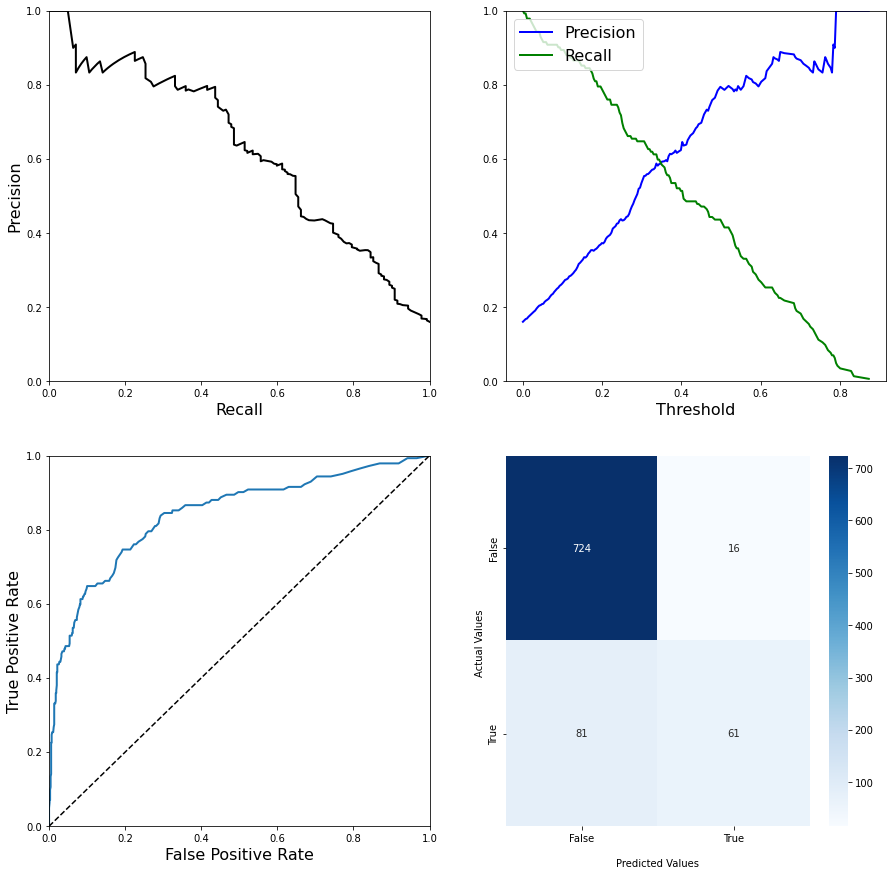

AUC of the ROC Curve is : 0.8412495241720593
F1 of the this model is : 0.8900226757369615
F_beta of the this model is : 0.8900226757369614


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_test_non_ethical, y_label_test_num, 5, make_plot=True, method="predict")

In [ ]:
y_pred = cross_val_predict(rd_search.best_estimator_, X_test_non_ethical, y_label_test_num, cv=10)
mean_squared_error(y_label_test_num, y_pred)

0.09136124070912952

Puis on teste sur le jeu de test √©thique :

In [ ]:
rdmfrst_regr = RandomForestRegressor(n_estimators=105, max_features=16, max_depth=7, random_state=264)
rdmfrst_regr.fit(X_train_ethical, y_label_num)

param_distribs = {
        'n_estimators': [randint(1, 350) for _ in range(15)],
        'max_features': [randint(1, 39) for _ in range(15)],
        'max_depth': [randint(1, 40) for _ in range(15)]
    }
rd_search = RandomizedSearchCV(rdmfrst_regr, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label_num)

RandomizedSearchCV(estimator=RandomForestRegressor(max_depth=7, max_features=16,
                                                   n_estimators=105,
                                                   random_state=264),
                   param_distributions={'max_depth': [18, 1, 3, 5, 9, 19, 15, 2,
                                                      34, 27, 30, 7, 32, 39,
                                                      7],
                                        'max_features': [14, 25, 23, 31, 6, 1,
                                                         14, 26, 36, 3, 16, 22,
                                                         10, 15, 32],
                                        'n_estimators': [332, 291, 176, 120,
                                                         233, 188, 259, 48, 240,
                                                         306, 20, 37, 12, 47,
                                                         49]},
                   return_train_scor

Error since this is not a classifier
Recalculating results as positives and negatives...


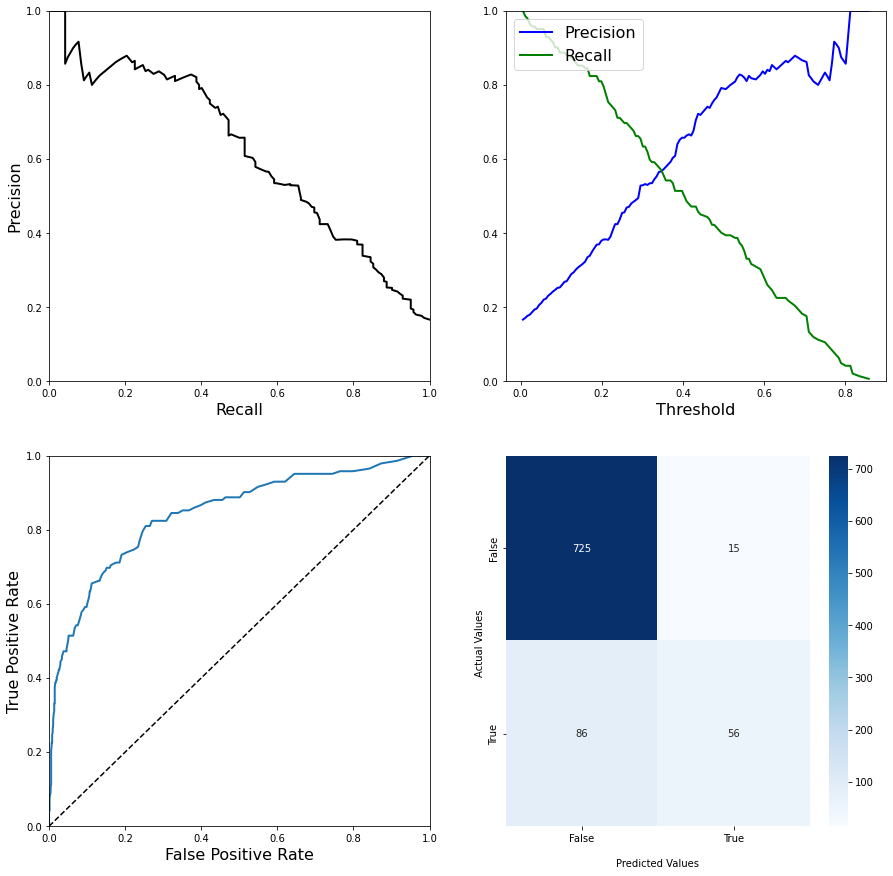

AUC of the ROC Curve is : 0.8438285116102017
F1 of the this model is : 0.8854875283446711
F_beta of the this model is : 0.8854875283446711


In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_test_ethical, y_label_test_num, 5, make_plot=True, method="predict")

In [ ]:
y_pred = cross_val_predict(rd_search.best_estimator_, X_test_ethical, y_label_test_num, cv=10)
mean_squared_error(y_label_test_num, y_pred)

0.09165844583356758

La RMSE est tr√®s faible, notre mod√®le s'adapte tr√®s bien au jeu de test, il est valid√©.

# Analyse de l'importance de chaque caract√©ristique

On commence par r√©cup√©rer tous les noms des attributs de notre jeu de donn√©es :

In [ ]:
def get_features(X, ethical=False):
  df = X.drop(columnsToDelete, axis=1)
  if ethical :
    df = df.drop(ethicalColumnsToDelete, axis=1)
  columns_features_num = df.select_dtypes(include=[np.number]).columns.tolist()
  columns_features_num.append("Overtime")
  columns_fetures_cat = pd.get_dummies(df.select_dtypes(exclude=[np.number])).columns.tolist()
  total_columns = columns_features_num
  total_columns.extend(columns_fetures_cat)
  return total_columns


In [ ]:
total_columns = get_features(X_train)
total_columns_ethical = get_features(X_train, True)

On vient entra√Æner le mod√®le choisi pour obtenir les attributs les plus importants ("feature importance") :

Error since this is not a classifier
Recalculating results as positives and negatives...


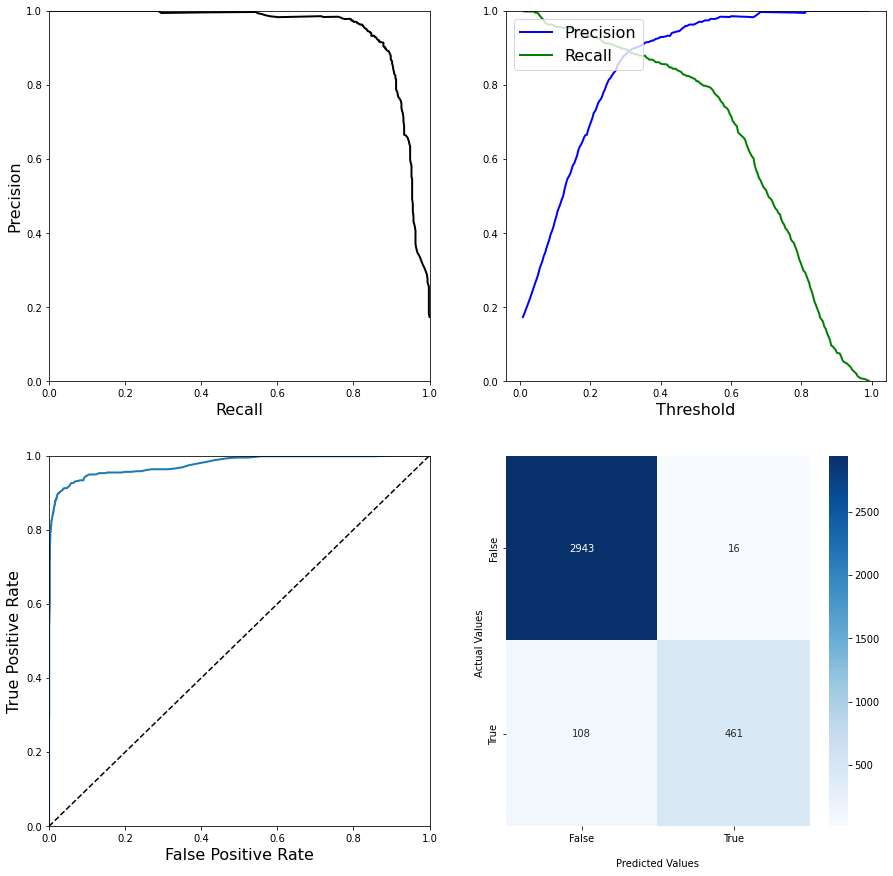

AUC of the ROC Curve is : 0.97622961968223
F1 of the this model is : 0.9648526077097506
F_beta of the this model is : 0.9648526077097505


In [ ]:
rdmfrst_regr = RandomForestRegressor(max_depth=32, max_features=40, n_estimators=253, random_state=264)
#result chose par la randomized search
rdmfrst_regr.fit(X_train_non_ethical, y_label)
result = crossValPredPlot(rdmfrst_regr , X_train_non_ethical, y_label, 5, make_plot=True, method="predict")

Error since this is not a classifier
Recalculating results as positives and negatives...


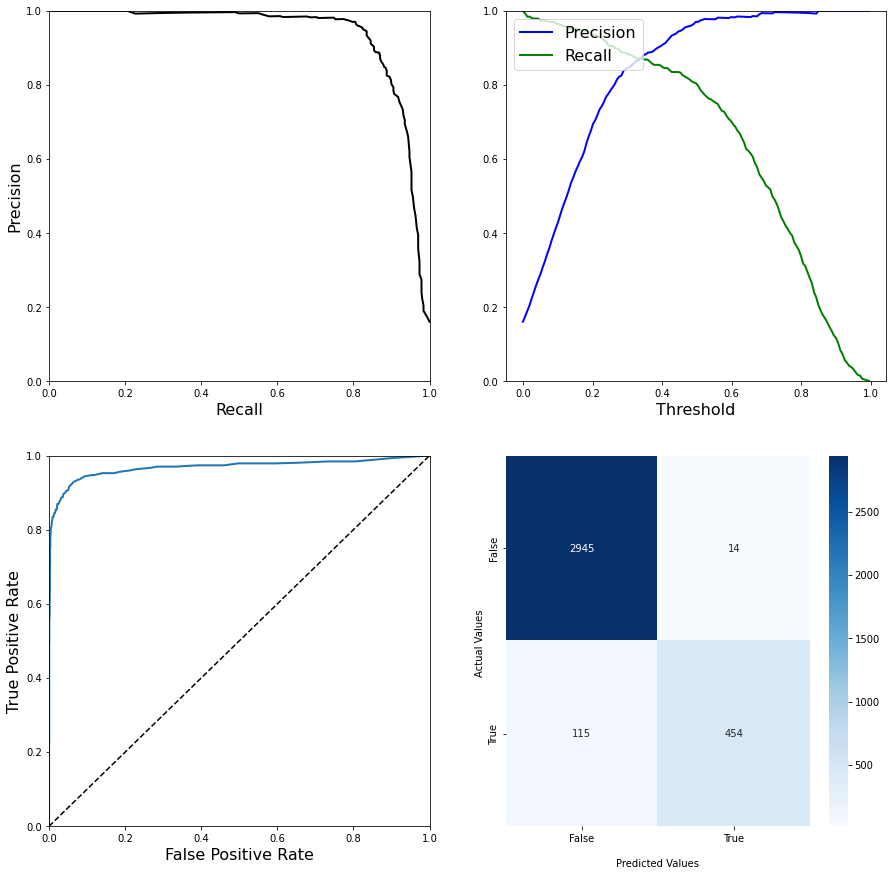

AUC of the ROC Curve is : 0.9682699292201385
F1 of the this model is : 0.9634353741496599
F_beta of the this model is : 0.9634353741496597


In [ ]:
rdmfrst_regr_ethical = RandomForestRegressor(max_depth=26, max_features=31, n_estimators=159, random_state=264)
#result chose par la randomized search
rdmfrst_regr_ethical.fit(X_train_ethical, y_label)
result_ethical = crossValPredPlot(rdmfrst_regr_ethical , X_train_ethical, y_label, 5, make_plot=True, method="predict")

In [ ]:
importances = rdmfrst_regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rdmfrst_regr.estimators_], axis=0)

In [ ]:
importances_ethical = rdmfrst_regr_ethical.feature_importances_
std_ethical = np.std([tree.feature_importances_ for tree in rdmfrst_regr_ethical.estimators_], axis=0)

On affiche par ordre croissant les crit√®res les plus influents sur notre variable cible (Attrition) : 

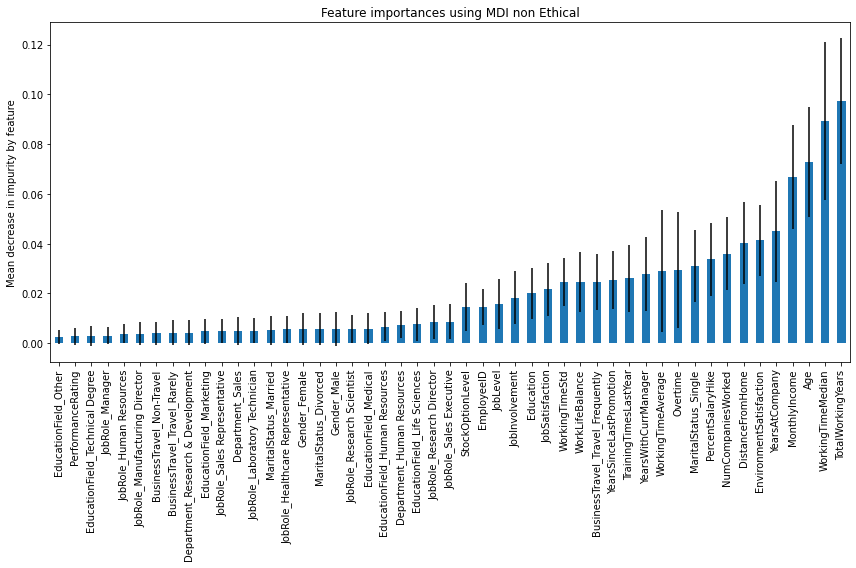

In [ ]:
importances_df = pd.Series(importances, index=total_columns)

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
sorted_idx = importances_df.argsort()
importances_df[sorted_idx].plot.bar(yerr=std[sorted_idx], ax=ax)
ax.set_title("Feature importances using MDI non Ethical")
ax.set_ylabel("Mean decrease in impurity by feature")
fig.tight_layout()
plt.show()

On remarque pour cette m√©thode (MDI) d'extraction des crit√®res importants que :    

* 4 crit√®res se distinguent : WorkingTimeMedian, TotalWorkingYears, Age, MonthlyIncome
* Parmi ces 4 crit√®res, un est non √©thique selon nous (Age) 

Il est donc int√©ressant d'effectuer la m√™me action sur le jeu √©thique :

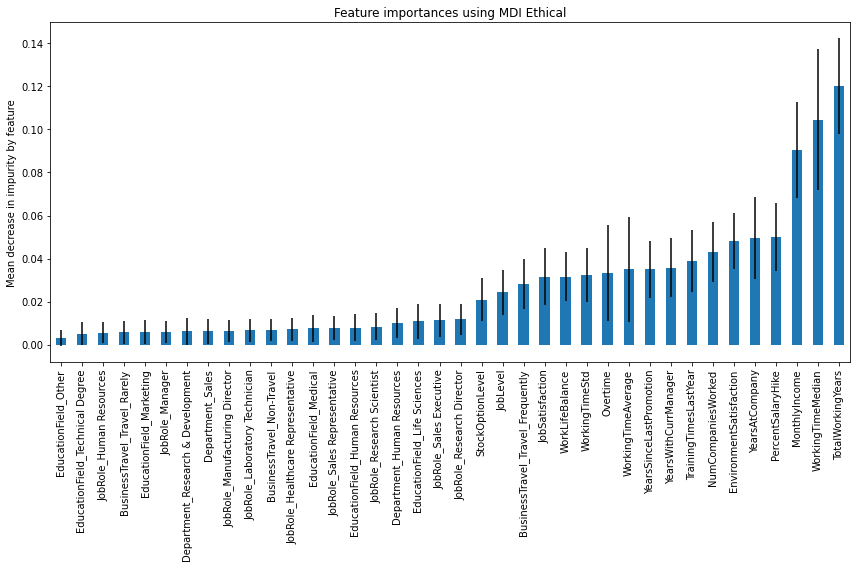

In [ ]:
importances_df = pd.Series(importances_ethical, index=total_columns_ethical)

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
sorted_idx = importances_df.argsort()
importances_df[sorted_idx].plot.bar(yerr=std_ethical[sorted_idx], ax=ax)
ax.set_title("Feature importances using MDI Ethical")
ax.set_ylabel("Mean decrease in impurity by feature")
fig.tight_layout()
plt.show()

On remarque que :     

* Dans les 4 crit√®res se distinguant, l'Age dispara√Æt pour laisser place √† YearsAtCompany

On va confirmer les crit√®res principaux avec une autre m√©thode (permutation),  qui permet de mieux voir l'influence de chaque crit√®re : 

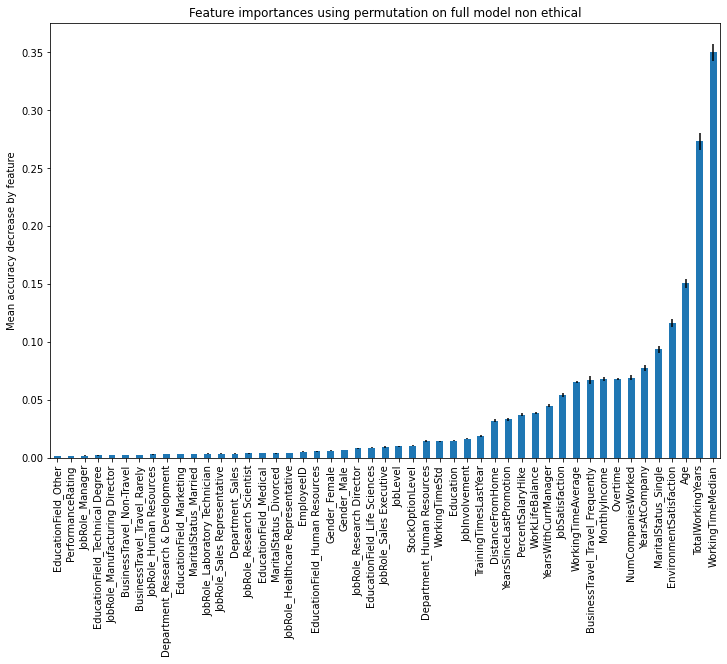

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rdmfrst_regr, X_train_non_ethical, y_label, n_repeats=50, random_state=264, n_jobs=5
)

importances_df = pd.Series(result.importances_mean, index=total_columns)

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
sorted_idx = importances_df.argsort()
importances_df[sorted_idx].plot.bar(yerr=result.importances_std[sorted_idx], ax=ax)
ax.set_title("Feature importances using permutation on full model non ethical")
ax.set_ylabel("Mean accuracy decrease by feature")
#fig.tight_layout()
plt.show()

On remarque quelques changements :     

* WorkingTimeMedian a un impact significatif 
* MaritalStatus[Single] appara√Æt √©galement comme important. C'est un attribut non √©thique selon nous

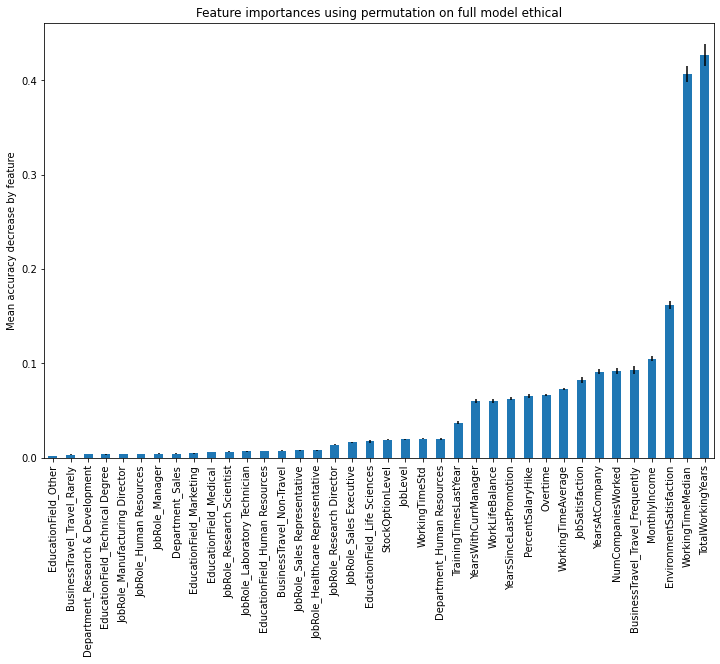

In [ ]:
result = permutation_importance(
    rdmfrst_regr_ethical, X_train_ethical, y_label, n_repeats=50, random_state=264, n_jobs=5
)

importances_df = pd.Series(result.importances_mean, index=total_columns_ethical)

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
sorted_idx = importances_df.argsort()
importances_df[sorted_idx].plot.bar(yerr=result.importances_std[sorted_idx], ax=ax)
ax.set_title("Feature importances using permutation on full model ethical")
ax.set_ylabel("Mean accuracy decrease by feature")
#fig.tight_layout()
plt.show()

Sur le jeu √©thique :    

* TotalWorkingYears et WorkingTimeMedian sont les deux crit√®res ayant un impact significatif

Apr√®s avoir regard√© les crit√®res importants vis √† vis de notre variable cible, nous cherchons √† quantifer l'impact de chaque attribut sur les r√©sultats du mod√®le s√©lectionn√© (RandomForest Regressor). On vient cr√©er un salari√© type en prenant la m√©diane de chaque caract√©ristique. Ensuite, on vient faire varier les caract√©ristiques une √† une pour regarder l'impact sur le r√©sultat de la r√©gression. 

In [ ]:
from math import ceil

medians = np.median(X_train_non_ethical,axis=0)
mins = np.amin(X_train_non_ethical,axis=0)
maxs = np.amax(X_train_non_ethical,axis=0)
prediction_per_features = []
for ifeature, _ in enumerate(medians) : 
  this_feature_prediction = []
  for ivalue in np.arange(mins[ifeature], maxs[ifeature], (maxs[ifeature]-mins[ifeature])/50):
    dataToTest = medians.copy()
    dataToTest[ifeature] = (ivalue)
    resultPrediction = rdmfrst_regr.predict([dataToTest])
    this_feature_prediction.append(resultPrediction[0])
  prediction_per_features.append(this_feature_prediction)



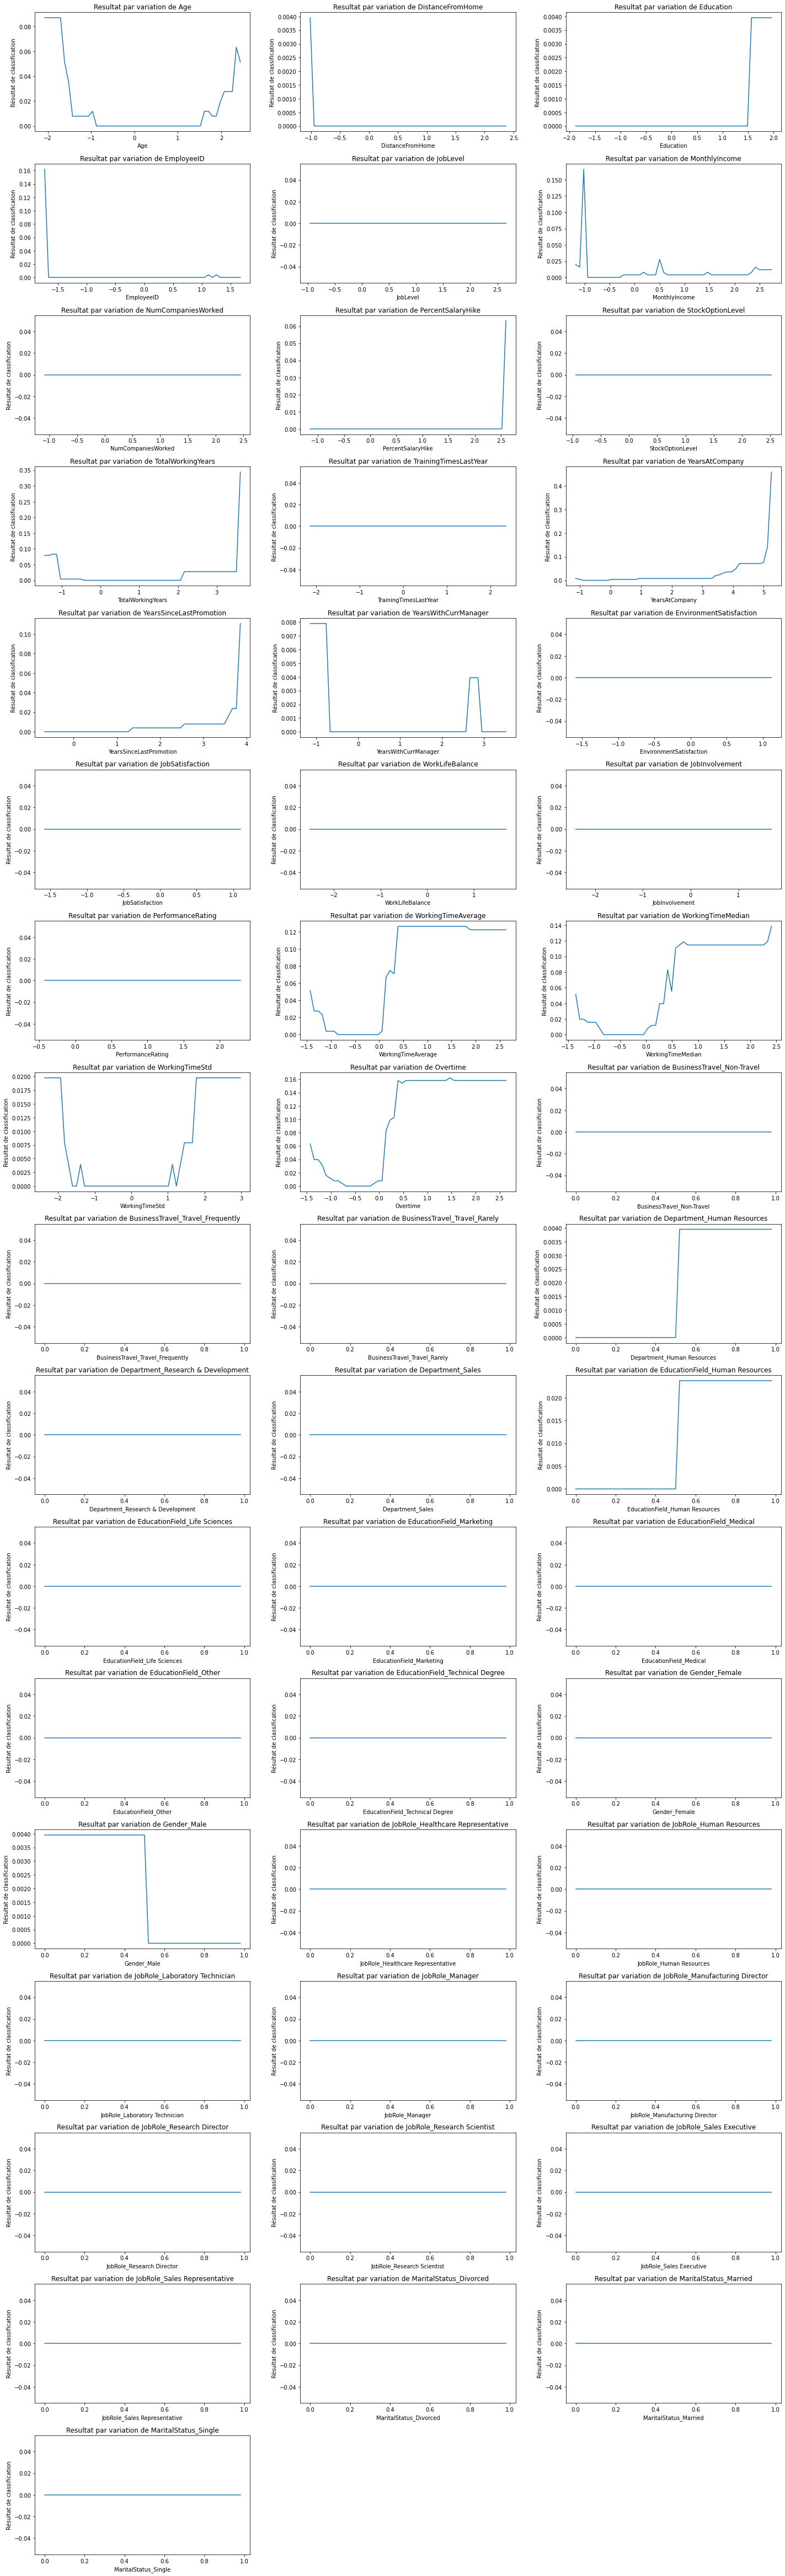

In [ ]:
plt.rcParams['figure.figsize'] = [20, 65]
for ifeature, _ in enumerate(medians) :
  plt.subplot(ceil(len(medians)/3), 3, ifeature+1)
  plt.title(f'Resultat par variation de {total_columns[ifeature]}')
  plt.xlabel(total_columns[ifeature]) 
  plt.ylabel("R√©sultat de classification") 
  plt.plot(np.arange(mins[ifeature], maxs[ifeature], (maxs[ifeature]-mins[ifeature])/50),prediction_per_features[ifeature]) 
plt.tight_layout()
plt.show()

Remarques :    

* Un seul des √©l√©ments ne permet pas de faire varier le r√©sultat de la r√©gression au-del√† du seuil (0.5) et donc de faire changer la valeur pr√©dite de l'Attrition

* Selon les courbes, on voit que certains crit√®res ont des effets de seuil (Overtime, WorkingTimeAverage, WorkingTimeMedian, YearsAtCompany, TotalWorkingYears)

* A l'inverse, certains attributs n'ont aucun impact sur un salari√© m√©dian (Gender, EducationField, BusinessTravel)


A partir de ces √©volutions, nous pouvons proposer des pistes d'am√©lioration pour donner aux employ√©s l'envie de rester :    

* 3 crit√®res ayant un impact sur le d√©part concernent le temps pass√© √† l'entreprise. L'entreprise devrait revoir sa politique horaire, en r√©duisant le nombre d'heures de certaines √©quipes (voire de toutes)

* 2 crit√®res se r√©f√®rent au temps pass√© (TotalWorkingYears et YearsAtCompany), ce qui peut laisser sous-entendre, via les graphiques ci-dessus, que la masse salariale est vieillissante, ou que ceux ayant une plus grande exp√©rience partent car la valorisation de leur travail n'est pas √† la hauteur de leurs attentes. L'entreprise devrait donc favoriser le recrutement et la formation d'une masse salariale plus jeune, bien que la mesure de l'effet sur l'Attrition sera sur le long terme, cela √©tant normal que les salari√©s √¢g√©s partent √† la retraite. Elle devrait √©galement mettre en place un processus de valorisation des salari√©s pr√©sents depuis longtemps

* On peut aussi imaginer que l'entreprise mette en place des audits de mani√®re r√©guli√®re pour cr√©er un esprit d'√©quipe, impliquer les salari√©s, et donc favoriser le maintien des √©quipes au sein de l'entreprise

Nous allons ensuite mettre en place une m√©thodologie pour quantifier l'impact d'une de nos pistes de solution sur l'Attrition. Nous nous int√©ressons ici √† l'impact de la r√©duction du temps m√©dian pass√© au travail.

# Impact de l'am√©lioration d'un crit√®re sur l'attrition : 

In [ ]:
print(f'Il est possible de tester un impact sur les colonnes suivantes : \n {data.columns}')

Il est possible de tester un impact sur les colonnes suivantes : 
 Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'WorkingTimeAverage',
       'WorkingTimeMedian', 'WorkingTimeStd'],
      dtype='object')


On r√©utilise le jeu complet pour effectuer les pr√©dictions du mod√®le : 

In [ ]:
X = data.drop('Attrition', axis=1)
y = data['Attrition'].copy()
X_pipelined = transformData(X, isTraining = False, ethical = True, columnsToRemove = columnsToDelete, ethicalColumnsToRemove=ethicalColumnsToDelete)
y_predicted = rdmfrst_regr_ethical.predict(X_pipelined)

In [ ]:
X['WorkingTimeMedian'] = (X.clip(upper=pd.Series({'WorkingTimeMedian': 6*60*60}), axis=1))['WorkingTimeMedian']

In [ ]:
X["WorkingTimeMedian"].head()

0    21600.0
1    21600.0
2    21600.0
3    21600.0
4    21600.0
Name: WorkingTimeMedian, dtype: float64

On prend l'hypoth√®se que l'entreprise a mis en place notre suggestion : limiter le temps m√©dian au travail √† 6 heures par exemple.

In [ ]:
X_pipelined = transformData(X, isTraining = False, ethical = True, columnsToRemove = columnsToDelete, ethicalColumnsToRemove=ethicalColumnsToDelete)
y_predicted_with_cap = rdmfrst_regr_ethical.predict(X_pipelined)
reduction_in_percentage = -((np.sum(y_predicted)-np.sum(y_predicted_with_cap))/np.sum(y_predicted))*100
print(f'Une reduction de {round(reduction_in_percentage,3)}% est constat√©e sur l\'attrition pr√©vue par l\'algorithme lors de la limitation de WorkingTimeMedian √† {6*60*60}s')

Une reduction de 8.985% est constat√©e sur l'attrition pr√©vue par l'algorithme lors de la limitation de WorkingTimeMedian √† 21600s



Notre suggestion a un impact positif sur le d√©part des salari√©s, puisqu'elle diminue grandement le taux. La d√©marche est analogue pour les autres suggestions.